<h1>Red Wine Quality Dataset</h1>
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

Link to dataset : https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

# Importing Library and Preparation

In [1]:
!pip install umap-learn
!pip install pandoc
!pip install optuna
!pip install eli5
!pip install pydotplus
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=d943bf25b5450af15e33a7793c7e12fbfd8587dee3a1f8dccf6b214717c6f76d
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=ceb6684a8c8caf399b6bf28d5c8f1f0e6fa4fe58817b3ed798a4ce31cebbbe4f
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import SelectKBest, RFE, mutual_info_regression, f_regression, r_regression
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer, mean_squared_error
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from umap import UMAP
import optuna
import pydot, pydotplus
from sklearn import tree
from sklearn.tree import _tree
import os
import gc
gc.enable()

import eli5
from eli5.sklearn import PermutationImportance

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading and Preparing Data

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/ML Project /Red Wine Quality/Data/Red Wine Quality - Train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ML Project /Red Wine Quality/Data/Red Wine Quality - Test.csv')

In [5]:
train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6,5
1,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,5
2,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6,5
3,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,6
4,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,5
1195,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3,5
1196,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6
1197,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6


In [6]:
test_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
2,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
3,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
4,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
395,9.3,0.390,0.40,2.60,0.073,10.0,26.0,0.99840,3.34,0.75,10.2,6
396,11.9,0.580,0.66,2.50,0.072,6.0,37.0,0.99920,3.05,0.56,10.0,5
397,7.3,0.365,0.49,2.50,0.088,39.0,106.0,0.99660,3.36,0.78,11.0,5
398,15.6,0.685,0.76,3.70,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7


In [7]:
ytest = test_df.pop('quality')
ytest

0      6
1      5
2      7
3      6
4      5
      ..
395    6
396    5
397    5
398    7
399    5
Name: quality, Length: 400, dtype: int64

# Exploratory Data Analysis

## Data type Checking

We'll check what kind of data that this dataframe contains

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1199 non-null   float64
 1   volatile acidity      1199 non-null   float64
 2   citric acid           1199 non-null   float64
 3   residual sugar        1199 non-null   float64
 4   chlorides             1199 non-null   float64
 5   free sulfur dioxide   1199 non-null   float64
 6   total sulfur dioxide  1199 non-null   float64
 7   density               1199 non-null   float64
 8   pH                    1199 non-null   float64
 9   sulphates             1199 non-null   float64
 10  alcohol               1199 non-null   float64
 11  quality               1199 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 112.5 KB


In [9]:
train_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         400 non-null    float64
 1   volatile acidity      400 non-null    float64
 2   citric acid           400 non-null    float64
 3   residual sugar        400 non-null    float64
 4   chlorides             400 non-null    float64
 5   free sulfur dioxide   400 non-null    float64
 6   total sulfur dioxide  400 non-null    float64
 7   density               400 non-null    float64
 8   pH                    400 non-null    float64
 9   sulphates             400 non-null    float64
 10  alcohol               400 non-null    float64
dtypes: float64(11)
memory usage: 34.5 KB


In [11]:
test_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

It contains all of them are float64, so all of them are continuous variable.

## NA value checking

In [12]:
train_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
test_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

No NAN value, great!

## Statistic

In [14]:
train_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,8.338032,0.530388,0.271034,2.557882,0.087227,16.132611,47.371977,0.996757,3.308874,0.658757,10.405922,5.642202
std,1.736475,0.183484,0.194574,1.477834,0.048135,10.616294,33.998178,0.001881,0.154309,0.176884,1.065632,0.815902
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000,3.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,8.000000,22.000000,0.995620,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.100000,6.000000
75%,9.250000,0.640000,0.420000,2.600000,0.090000,22.000000,63.500000,0.997845,3.400000,0.730000,11.000000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
for col in train_df.columns :
    print('='*10, col, '='*10)
    print(f'Mean : {train_df[col].mean()}')
    print(f'STD : {train_df[col].std()}')
    print(f'Min : {train_df[col].min()}')
    print(f'Max : {train_df[col].max()}')
    print(f'Skew : {train_df[col].skew()}')
    print('')

========== fixed acidity ==========
Mean : 8.338031693077564
STD : 1.7364754650529726
Min : 4.7
Max : 15.9
Skew : 0.9625528766836075

========== volatile acidity ==========
Mean : 0.5303878231859884
STD : 0.18348393974793673
Min : 0.12
Max : 1.58
Skew : 0.7443903223979444

========== citric acid ==========
Mean : 0.27103419516263555
STD : 0.19457354077472774
Min : 0.0
Max : 1.0
Skew : 0.3407558721466465

========== residual sugar ==========
Mean : 2.557881567973311
STD : 1.4778337198383864
Min : 0.9
Max : 15.5
Skew : 4.573625870143348

========== chlorides ==========
Mean : 0.08722685571309423
STD : 0.04813476053045143
Min : 0.012
Max : 0.611
Skew : 5.862287399810819

========== free sulfur dioxide ==========
Mean : 16.1326105087573
STD : 10.616293542878823
Min : 1.0
Max : 72.0
Skew : 1.3127679944780473

========== total sulfur dioxide ==========
Mean : 47.371976647206004
STD : 33.998178268186386
Min : 6.0
Max : 289.0
Skew : 1.5610396077840116

========== density ==========
Mean : 0.99

## Visualization

### Distribution of each variable

In [16]:
train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6,5
1,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,5
2,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6,5
3,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,6
4,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,5
1195,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3,5
1196,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6
1197,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

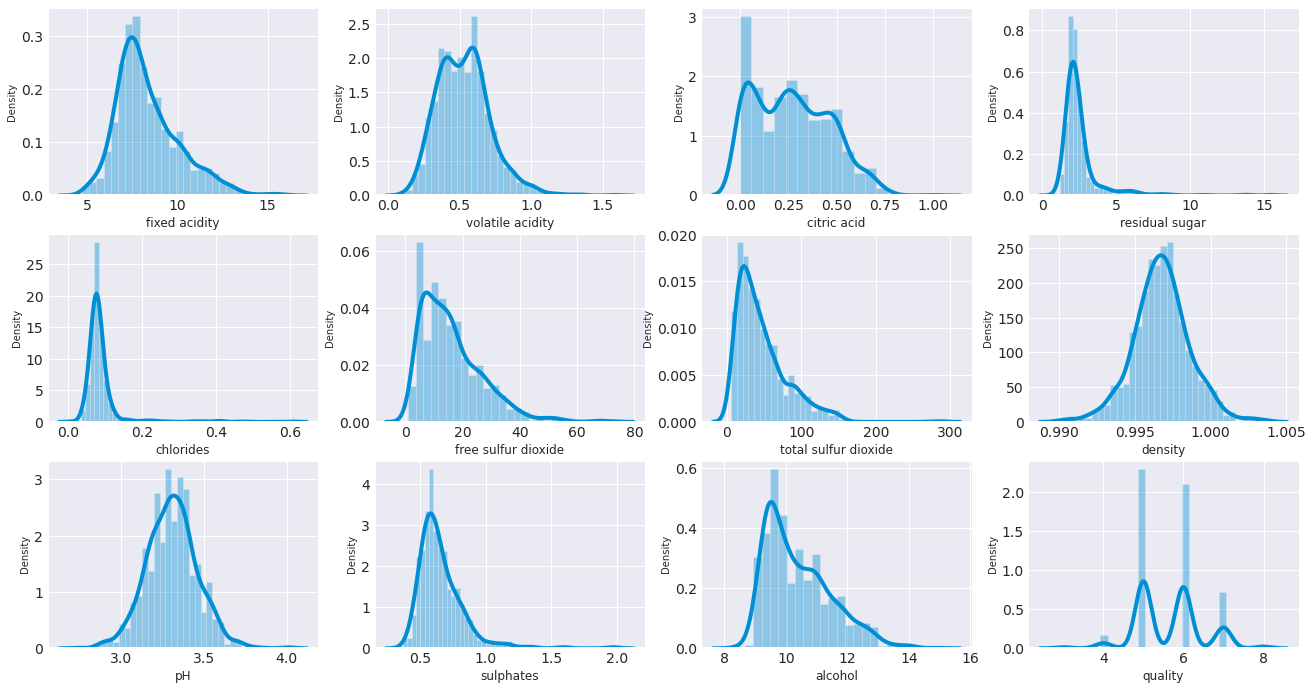

In [17]:
f, axes = plt.subplots(3, 4, figsize = (20, 11))
for col, ax in zip(train_df.columns, axes.ravel()) :
    _ = sns.distplot(train_df[col], ax = ax)
    ax.set_title('')
    ax.set_xlabel(col, fontsize = 12)
    ax.set_ylabel('Density', fontsize = 10)
plt.show()

We have made the visualization of 11 independent variables and 1 dependent variable. Each of the variable has their own distribution (normal, skewed normal, etc).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

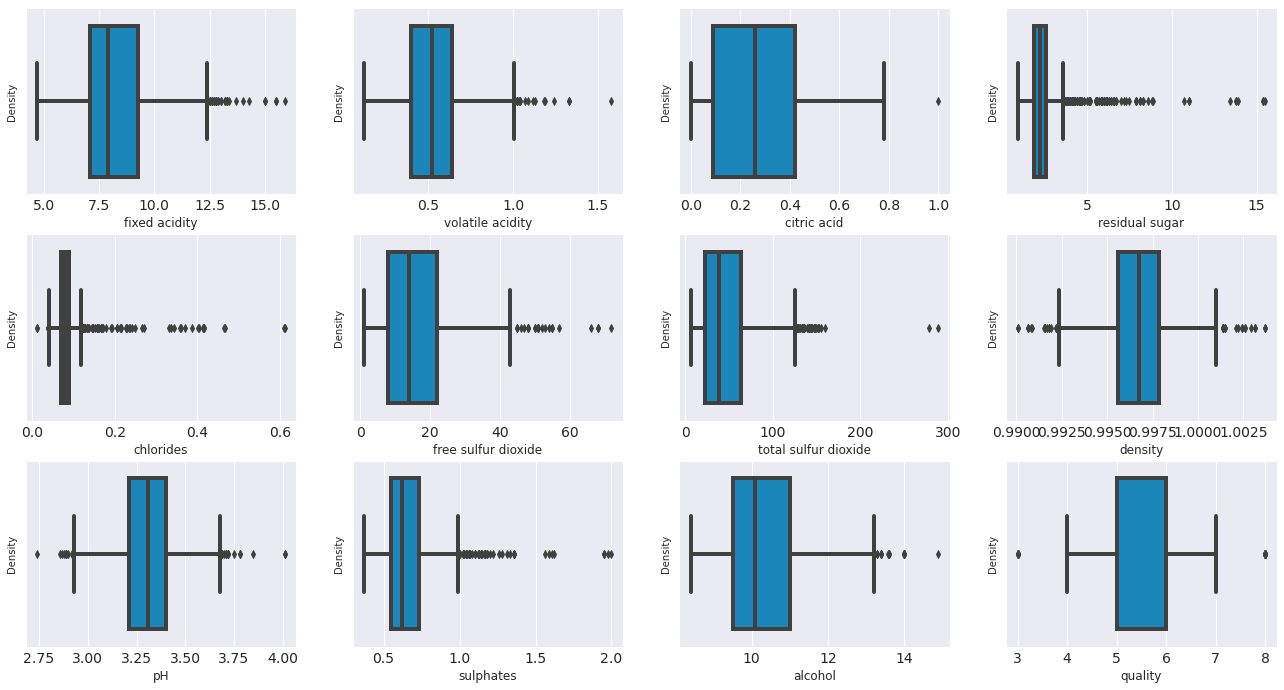

In [18]:
f, axes = plt.subplots(3, 4, figsize = (20, 11))
for col, ax in zip(train_df.columns, axes.ravel()) :
    _ = sns.boxplot(train_df[col], ax = ax)
    ax.set_title('')
    ax.set_xlabel(col, fontsize = 12)
    ax.set_ylabel('Density', fontsize = 10)
plt.show()

**Boxplot** is useful if we want to spot an outlier! If we have a lot of things going on in our data, we can see them by using boxplot. In this example, the little dots that are not in the box are called **outlier**

## Correlation

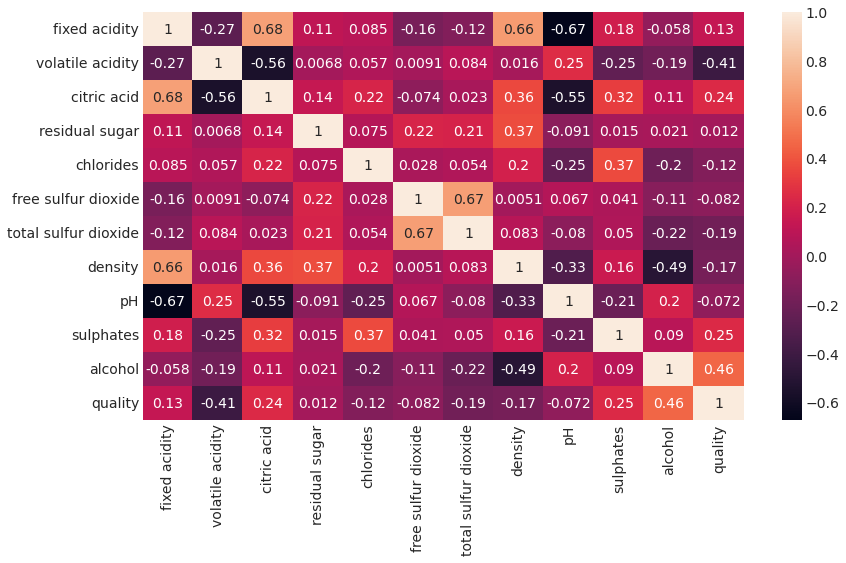

In [19]:
sns.heatmap(train_df.corr(), annot = True)

### Taking y-variable

In [20]:
y = train_df.pop('quality')
y

0       5
1       5
2       5
3       6
4       5
       ..
1194    5
1195    5
1196    6
1197    6
1198    5
Name: quality, Length: 1199, dtype: int64

### VIF (Variance Inflation Factor)
VIF is used to detect Multicollinearity in the feature that we have.

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = train_df.columns
vif['VIF'] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
vif

,features,VIF
0,fixed acidity,75.445562
1,volatile acidity,16.424506
2,citric acid,9.407225
3,residual sugar,4.446652
4,chlorides,6.271509
5,free sulfur dioxide,6.475029
6,total sulfur dioxide,6.389552
7,density,1459.383645
8,pH,1057.285158
9,sulphates,19.799011


VIF tells that if a variable has a high VIF value, then that variable is strongly correlated with other variables. Which could lead into bad model performance. There are three solution to this problem : <br>
1.   Dropping the features
2.   Transforming the features (to something that makes sense)
3.   PCA

For now, we'll just let the variable like that. I want to see the correlation of these independent variables with the dependent variable.



### Correlation Independent to Dependent

We'll be looking for the correlation coefficient value of the independent to dependent variables as well!

In [22]:
correlation = train_df.corrwith(y).sort_values(ascending = False)
correlation

alcohol                 0.462611
sulphates               0.247010
citric acid             0.242519
fixed acidity           0.134515
residual sugar          0.012275
pH                     -0.072022
free sulfur dioxide    -0.081731
chlorides              -0.123183
density                -0.166300
total sulfur dioxide   -0.189712
volatile acidity       -0.411626
dtype: float64

Alcohol has the best positive correlation value while volatile acidity has the best negative correlation value.

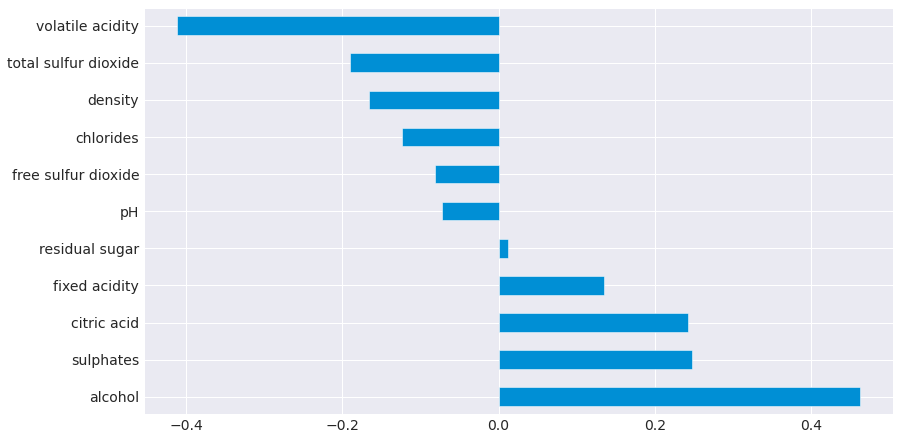

In [23]:
correlation.plot.barh()

We'll also look at the absolute value in the correlation.

In [24]:
print(correlation.abs().sort_values(ascending = False))

alcohol                 0.462611
volatile acidity        0.411626
sulphates               0.247010
citric acid             0.242519
total sulfur dioxide    0.189712
density                 0.166300
fixed acidity           0.134515
chlorides               0.123183
free sulfur dioxide     0.081731
pH                      0.072022
residual sugar          0.012275
dtype: float64


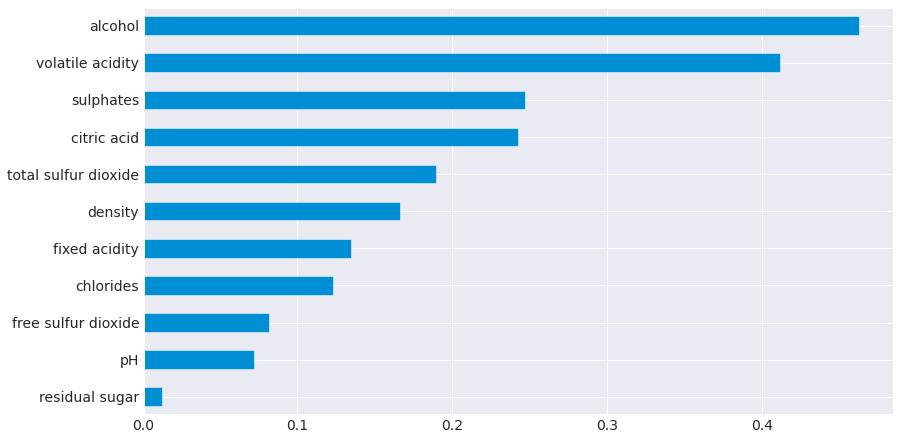

In [25]:
correlation.abs().sort_values(ascending = True).plot.barh()

In terms of who correlates most to the dependent variable, **alcohol** has the most correlation followed by **volatile acidity** and then **sulphates** <br>

We'll also try using other method to find a connection / correlation between independent variables and dependent variable.

### Mutual Info Regression

In [26]:
mi_scores = mutual_info_regression(train_df, y, random_state = 0)
mi_scores = pd.Series(
    mi_scores,
    index = train_df.columns
).sort_values(ascending = False)
mi_scores

alcohol                 0.169508
volatile acidity        0.132157
sulphates               0.121469
citric acid             0.093815
total sulfur dioxide    0.086702
density                 0.066426
fixed acidity           0.038815
free sulfur dioxide     0.020430
pH                      0.018621
chlorides               0.015081
residual sugar          0.000000
dtype: float64

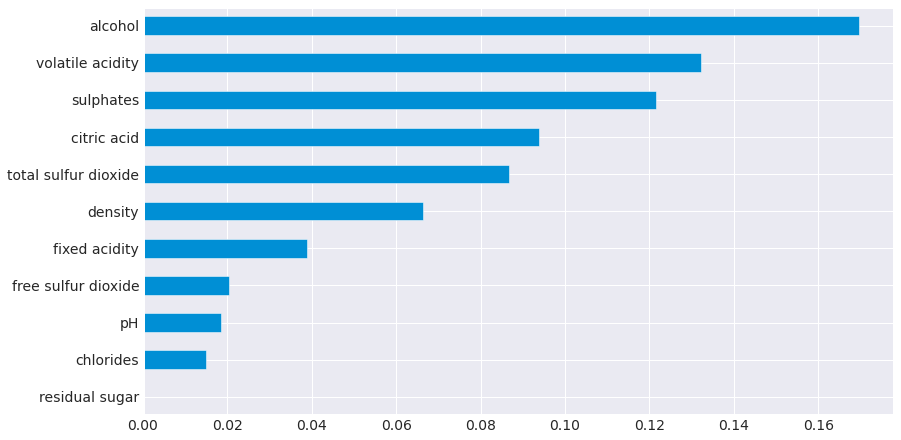

In [27]:
mi_scores.sort_values().plot.barh()

MI Regression is almost the same as regular absolute correlation.

### Select K Best

In [28]:
kBest = SelectKBest(f_regression, k = 'all').fit(train_df, y)
kScore = pd.Series(
    kBest.scores_,
    index = kBest.feature_names_in_
).sort_values(ascending = False)
kScore

alcohol                 325.918093
volatile acidity        244.188622
sulphates                77.779030
citric acid              74.801347
total sulfur dioxide     44.689155
density                  34.045205
fixed acidity            22.058108
chlorides                18.443174
free sulfur dioxide       8.049586
pH                        6.241382
residual sugar            0.180382
dtype: float64

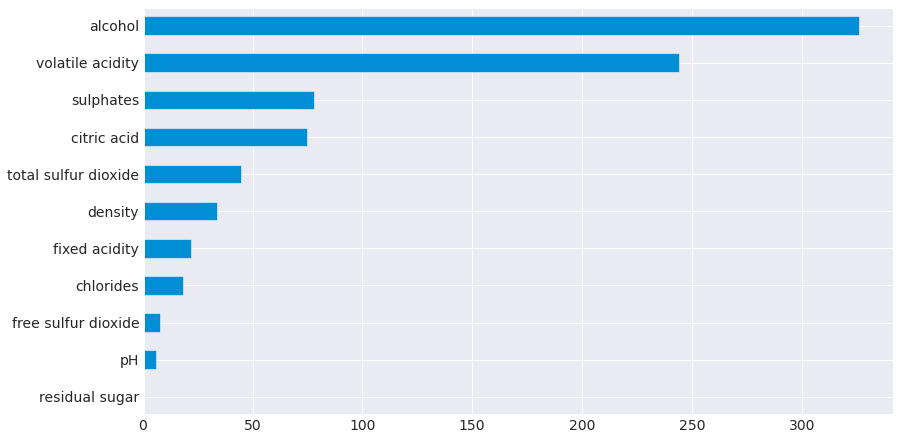

In [29]:
kScore.sort_values().plot.barh()

Select K Best tells the same story.

It seems that it's settled that the best features to select are **alcohol**, **volatile acidity**, and **sulphates**. <br>

### PCA Correlation

We can also use the information we get from PCA to find correlation between the PCA, features, and the target variable.

In [30]:
pca = make_pipeline(
    StandardScaler(),
    PCA(random_state = 0)
).fit(train_df, y)

pca_df = pd.DataFrame(
    pca.transform(train_df),
    columns = [f'PC{i}' for i in range(1, train_df.shape[1] + 1)]
)

loadings = pd.DataFrame(
    pca[1].components_,
    index = pca_df.columns,
    columns = train_df.columns
).T

explained_variance_ratio = pd.Series(
    pca[1].explained_variance_ratio_,
    index = pca_df.columns
)

In [31]:
display(loadings.style.background_gradient())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,0.485085,-0.120348,-0.151457,-0.229279,-0.058220,0.104267,-0.329749,-0.213282,-0.201799,-0.240580,0.638447
volatile acidity,-0.248664,0.269177,-0.439641,0.133906,0.223203,0.410772,-0.533152,-0.082769,0.095819,0.368307,0.002792
citric acid,0.467208,-0.154621,0.222779,-0.084782,-0.042585,0.076020,0.100355,-0.356308,0.388818,0.630902,-0.084586
residual sugar,0.152126,0.293657,0.085091,-0.337834,0.726411,0.055521,0.284026,0.335261,0.001585,0.094976,0.190792
chlorides,0.209837,0.148311,-0.044791,0.687274,0.212028,0.304845,0.390591,-0.329204,-0.073542,-0.228416,0.056706
free sulfur dioxide,-0.029460,0.518474,0.412662,-0.084184,-0.150768,-0.021968,-0.079743,-0.259357,-0.631419,0.231274,-0.062639
total sulfur dioxide,0.028093,0.556367,0.319762,-0.059545,-0.243079,0.143061,-0.143586,0.032528,0.593025,-0.352015,0.083976
density,0.389755,0.237613,-0.363571,-0.143950,0.178725,-0.378625,-0.155256,-0.237856,0.009039,-0.254473,-0.563834
pH,-0.435262,0.012190,0.051999,0.003118,0.281677,-0.518973,0.007316,-0.548374,0.204368,-0.002136,0.341280
sulphates,0.249464,-0.031537,0.305502,0.536942,0.184337,-0.404869,-0.458939,0.356544,0.006083,0.114356,0.079832


In [32]:
mi_pca = mutual_info_regression(pca_df, y, random_state = 0)
mi_pca = pd.Series(
    mi_pca,
    index = pca_df.columns
).sort_values(ascending = False)
mi_pca

PC2     0.169139
PC3     0.161660
PC9     0.107250
PC5     0.106142
PC8     0.102138
PC6     0.092096
PC1     0.086848
PC7     0.066304
PC11    0.061956
PC10    0.061111
PC4     0.058973
dtype: float64

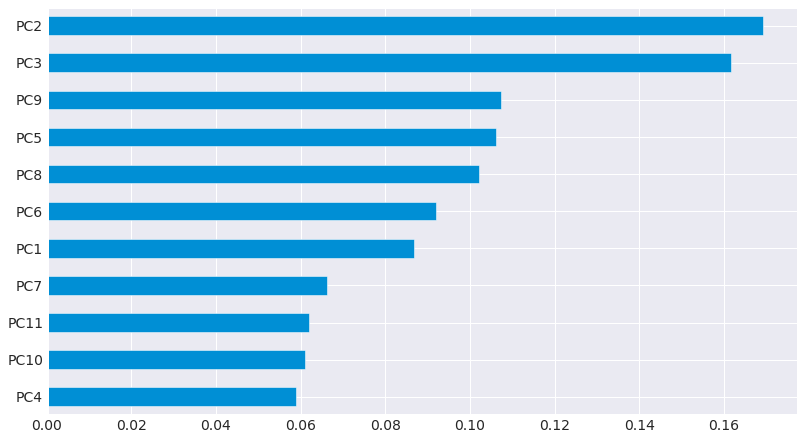

In [33]:
mi_pca.sort_values(ascending = True).plot.barh()

This method is one of the most powerful method to make a new features. By seeing the correlation between PCA-transformed variables and dependent variable, we can see which PC has the most correlation and when we see, we can find out what made that PC (Component of the PC)

Example : PC2 is the most correlative to target variable. So let's see what PC2 is made of.

In [34]:
display(loadings.style.background_gradient())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,0.485085,-0.120348,-0.151457,-0.229279,-0.058220,0.104267,-0.329749,-0.213282,-0.201799,-0.240580,0.638447
volatile acidity,-0.248664,0.269177,-0.439641,0.133906,0.223203,0.410772,-0.533152,-0.082769,0.095819,0.368307,0.002792
citric acid,0.467208,-0.154621,0.222779,-0.084782,-0.042585,0.076020,0.100355,-0.356308,0.388818,0.630902,-0.084586
residual sugar,0.152126,0.293657,0.085091,-0.337834,0.726411,0.055521,0.284026,0.335261,0.001585,0.094976,0.190792
chlorides,0.209837,0.148311,-0.044791,0.687274,0.212028,0.304845,0.390591,-0.329204,-0.073542,-0.228416,0.056706
free sulfur dioxide,-0.029460,0.518474,0.412662,-0.084184,-0.150768,-0.021968,-0.079743,-0.259357,-0.631419,0.231274,-0.062639
total sulfur dioxide,0.028093,0.556367,0.319762,-0.059545,-0.243079,0.143061,-0.143586,0.032528,0.593025,-0.352015,0.083976
density,0.389755,0.237613,-0.363571,-0.143950,0.178725,-0.378625,-0.155256,-0.237856,0.009039,-0.254473,-0.563834
pH,-0.435262,0.012190,0.051999,0.003118,0.281677,-0.518973,0.007316,-0.548374,0.204368,-0.002136,0.341280
sulphates,0.249464,-0.031537,0.305502,0.536942,0.184337,-0.404869,-0.458939,0.356544,0.006083,0.114356,0.079832


In [35]:
loadings['PC2'].sort_values(ascending = False)

total sulfur dioxide    0.556367
free sulfur dioxide     0.518474
residual sugar          0.293657
volatile acidity        0.269177
density                 0.237613
chlorides               0.148311
pH                      0.012190
sulphates              -0.031537
fixed acidity          -0.120348
citric acid            -0.154621
alcohol                -0.380735
Name: PC2, dtype: float64

PC2 highest absolute values are total sulfur dioxide and free sulfur dioxide. These 2 variables contribute the most to PC2, and PC2 correlates the most to dependent variable. So, in conclusion we can say that these 2 variables indirectly correlates to dependent variable as well. But we should do something with these two variables, let's say **making a ratio of free/total sulfur dioxide.**

In [36]:
train_df['free total ratio'] = train_df['free sulfur dioxide'] / train_df['total sulfur dioxide']
train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,free total ratio
0,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6,0.253968
1,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,0.287879
2,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6,0.454545
3,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,0.466667
4,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,0.142857
1195,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3,0.490909
1196,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,0.126582
1197,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,0.127660


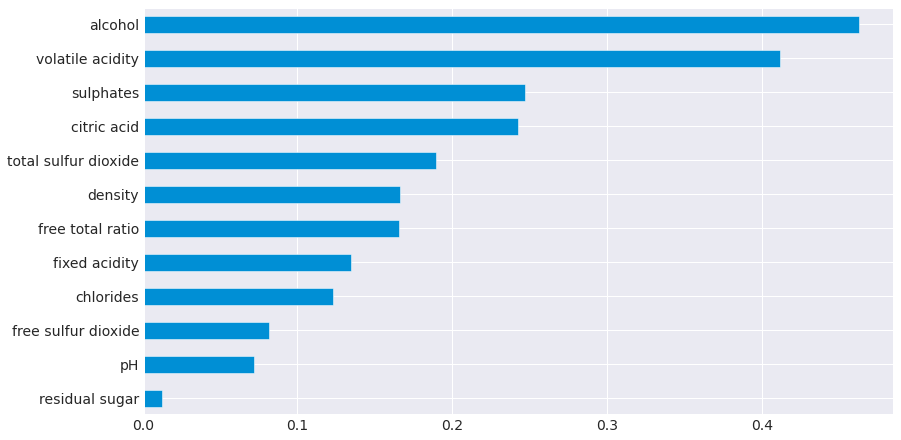

In [37]:
train_df.corrwith(y).abs().sort_values().plot.barh()

In [38]:
train_df.corrwith(y).abs().sort_values(ascending = False)

alcohol                 0.462611
volatile acidity        0.411626
sulphates               0.247010
citric acid             0.242519
total sulfur dioxide    0.189712
density                 0.166300
free total ratio        0.165536
fixed acidity           0.134515
chlorides               0.123183
free sulfur dioxide     0.081731
pH                      0.072022
residual sugar          0.012275
dtype: float64

As we can see, it made some good correlation score (0.165536). We can keep that variable so we can use it as a predictor of our estimator.

# Feature Engineering

By looking at the PCA and correlation graph above, there are some features that potentially could be added and make some effect on dependent variables.

* Free / Total Sulfur Dioxide Ratio
* Total - Free Sulfur Dioxide = Sulfur Dioxide
* Alcohol / Volatile Acidity
* Alcohol / Total Sulfur Dioxide
* Sulfur Dioxide + Sulphates

Let's start making some variables.

In [39]:
train_df['free total ratio'] = train_df['free sulfur dioxide'] / train_df['total sulfur dioxide']
test_df['free total ratio'] = test_df['free sulfur dioxide'] / test_df['total sulfur dioxide']

train_df['sulfur dioxide'] = train_df['total sulfur dioxide'] - train_df['free sulfur dioxide']
test_df['sulfur dioxide'] = test_df['total sulfur dioxide'] - test_df['free sulfur dioxide']

train_df['alcohol volatile ratio'] = train_df['alcohol'] / train_df['volatile acidity']
test_df['alcohol volatile ratio'] = test_df['alcohol'] / test_df['volatile acidity']

train_df['alcohol total sulfur ratio'] = train_df['alcohol'] / train_df['total sulfur dioxide']
test_df['alcohol total sulfur ratio'] = test_df['alcohol'] / test_df['total sulfur dioxide']

train_df['sulfur plus sulphates'] = train_df['sulfur dioxide'] + train_df['sulphates']
test_df['sulfur plus sulphates'] = test_df['sulfur dioxide'] + test_df['sulphates']

In [40]:
train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,free total ratio,sulfur dioxide,alcohol volatile ratio,alcohol total sulfur ratio,sulfur plus sulphates
0,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6,0.253968,47.0,12.885906,0.152381,47.82
1,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,0.287879,47.0,22.093023,0.143939,47.64
2,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6,0.454545,12.0,17.142857,0.436364,12.44
3,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,0.466667,16.0,13.630573,0.356667,16.55
4,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,0.137931,75.0,23.333333,0.120690,75.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,0.142857,30.0,14.656489,0.274286,30.42
1195,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3,0.490909,28.0,13.984962,0.169091,28.51
1196,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,0.126582,69.0,16.666667,0.120253,69.69
1197,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,0.127660,41.0,27.021277,0.270213,41.68


In [41]:
train_df.corrwith(y).abs().sort_values(ascending = False)

alcohol                       0.462611
alcohol volatile ratio        0.449991
volatile acidity              0.411626
sulphates                     0.247010
citric acid                   0.242519
sulfur dioxide                0.198956
sulfur plus sulphates         0.197338
total sulfur dioxide          0.189712
alcohol total sulfur ratio    0.179974
density                       0.166300
free total ratio              0.165536
fixed acidity                 0.134515
chlorides                     0.123183
free sulfur dioxide           0.081731
pH                            0.072022
residual sugar                0.012275
dtype: float64

After we created some features, let's delete features that seem useless for us.

In [42]:
mi_scores = mutual_info_regression(train_df, y, random_state = 0)
mi_scores = pd.Series(
    mi_scores,
    index = train_df.columns
).sort_values(ascending = False)
mi_scores

alcohol volatile ratio        0.244383
sulfur plus sulphates         0.199644
alcohol                       0.183721
volatile acidity              0.152226
alcohol total sulfur ratio    0.151298
sulphates                     0.125416
total sulfur dioxide          0.101471
sulfur dioxide                0.092488
density                       0.083669
free total ratio              0.079829
citric acid                   0.079613
fixed acidity                 0.056998
pH                            0.029764
free sulfur dioxide           0.006859
chlorides                     0.000667
residual sugar                0.000000
dtype: float64

In [43]:
kBest = SelectKBest(f_regression, k = 'all').fit(train_df, y)
kScore = pd.Series(
    kBest.scores_,
    index = kBest.feature_names_in_
).sort_values(ascending = False)
kScore

alcohol                       325.918093
alcohol volatile ratio        303.924538
volatile acidity              244.188622
sulphates                      77.779030
citric acid                    74.801347
sulfur dioxide                 49.334003
sulfur plus sulphates          48.502497
total sulfur dioxide           44.689155
alcohol total sulfur ratio     40.069381
density                        34.045205
free total ratio               33.724366
fixed acidity                  22.058108
chlorides                      18.443174
free sulfur dioxide             8.049586
pH                              6.241382
residual sugar                  0.180382
dtype: float64

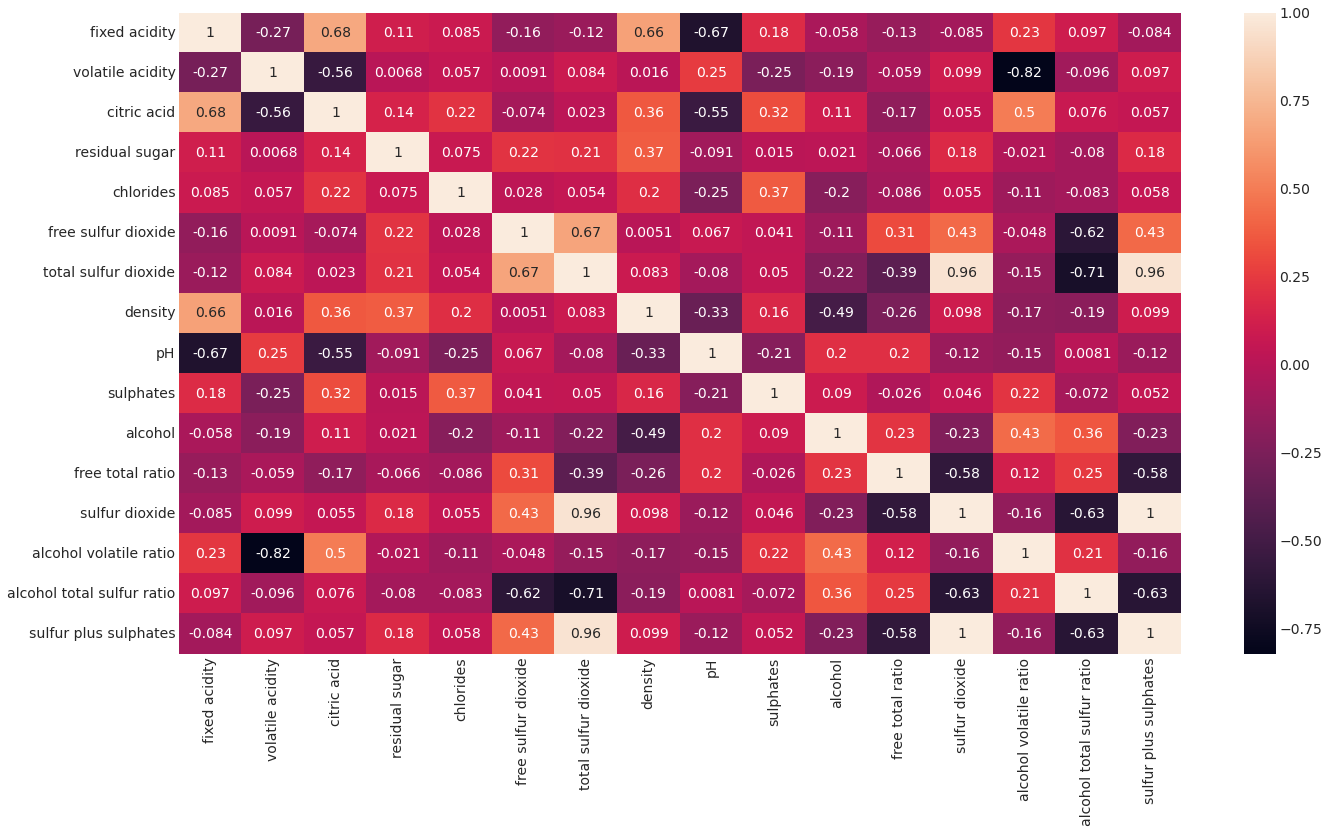

In [44]:
plt.rcParams['figure.figsize'] = (20, 11)
sns.heatmap(train_df.corr(), annot = True)

In [45]:
vif = pd.DataFrame()
vif['features'] = train_df.columns
vif['VIF'] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,fixed acidity,77.479985
1,volatile acidity,37.867131
2,citric acid,9.548586
3,residual sugar,4.638033
4,chlorides,6.309068
5,free sulfur dioxide,inf
6,total sulfur dioxide,inf
7,density,1524.912181
8,pH,1078.601377
9,sulphates,inf


Dang, we have a lot of multicollinearity in our data. Seems this is the effect of the feature engineering we made before. We'll remove one of them. I'll make notes of high correlation coefficient here. <br><br>

* Sulfur Plus Sulphates + Sulfur Dioxide = 1 (VIF)
* Sulfur Plus Sulphates + Total Sulfur Dioxide = 0.96 (VIF)
* Alcohol Volatile Ratio + Volatile Acidity = -0.82 
* Alcohol Total Sulfur Ratio + Total Sulfur Dioxide = -0.71 (VIF)
* Fixed Acidity + pH = -0.67
* Fixed Acidity + density = 0.66
* Alcohol Total Sulfur Ratio + Sulfur Dioxide = -0.63 (VIF)
* Alcohol Total Sulfur Ratio + Sulfur Plus Sulphates = -0.63 (VIF)
* Alcohol Total Sulfur Ratio + Free Sulfur Dioxide = -0.62 (VIF)
* Free Total Ratio + Sulfur Plus Sulphates = -0.58 (VIF)
* Free Total Ratio + Sulfur Dioxide = -0.58 (VIF)

Probably I'll drop the one with infinite VIF first.

In [46]:
train_df.drop('sulfur plus sulphates', axis = 1, inplace = True)
test_df.drop('sulfur plus sulphates', axis = 1, inplace = True)

In [47]:
vif = pd.DataFrame()
vif['features'] = train_df.columns
vif['VIF'] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,fixed acidity,77.479985
1,volatile acidity,37.867131
2,citric acid,9.548586
3,residual sugar,4.638033
4,chlorides,6.309068
5,free sulfur dioxide,inf
6,total sulfur dioxide,inf
7,density,1524.912181
8,pH,1078.601377
9,sulphates,20.068467


It's these three left, now let's decide which one to drop.

In [48]:
kBest = SelectKBest(f_regression, k = 'all').fit(train_df, y)
kScore = pd.Series(
    kBest.scores_,
    index = kBest.feature_names_in_
).sort_values(ascending = False)
kScore

alcohol                       325.918093
alcohol volatile ratio        303.924538
volatile acidity              244.188622
sulphates                      77.779030
citric acid                    74.801347
sulfur dioxide                 49.334003
total sulfur dioxide           44.689155
alcohol total sulfur ratio     40.069381
density                        34.045205
free total ratio               33.724366
fixed acidity                  22.058108
chlorides                      18.443174
free sulfur dioxide             8.049586
pH                              6.241382
residual sugar                  0.180382
dtype: float64

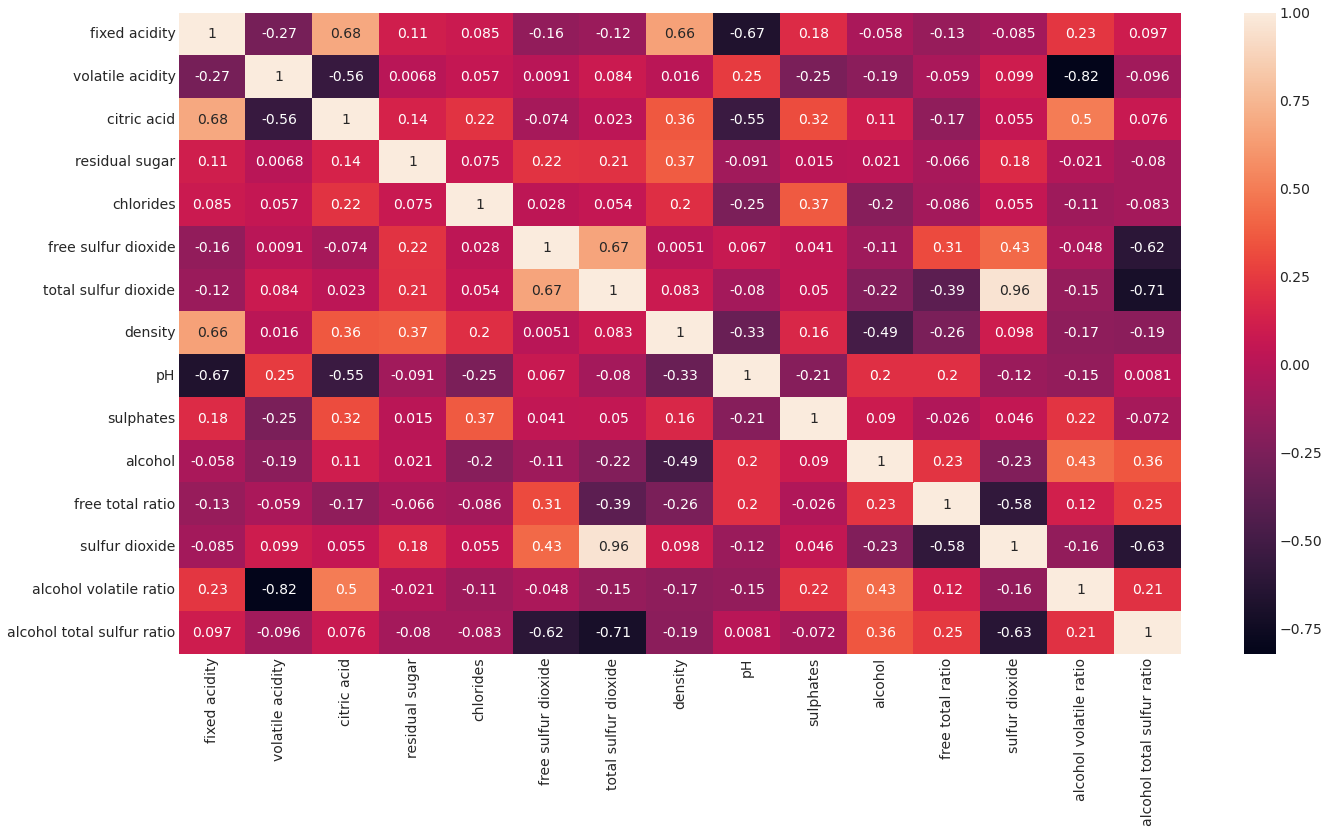

In [49]:
plt.rcParams['figure.figsize'] = (20, 11)
sns.heatmap(train_df.corr(), annot = True)

In [50]:
train_df.drop('total sulfur dioxide', axis = 1, inplace = True)
test_df.drop('total sulfur dioxide', axis = 1, inplace = True)

In [51]:
vif = pd.DataFrame()
vif['features'] = train_df.columns
vif['VIF'] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
vif

,features,VIF
0,fixed acidity,77.479985
1,volatile acidity,37.867131
2,citric acid,9.548586
3,residual sugar,4.638033
4,chlorides,6.309068
5,free sulfur dioxide,15.509709
6,density,1524.912181
7,pH,1078.601377
8,sulphates,20.068467
9,alcohol,165.169258


Things are getting better now, we'll transform/delete those features that has really high VIF.

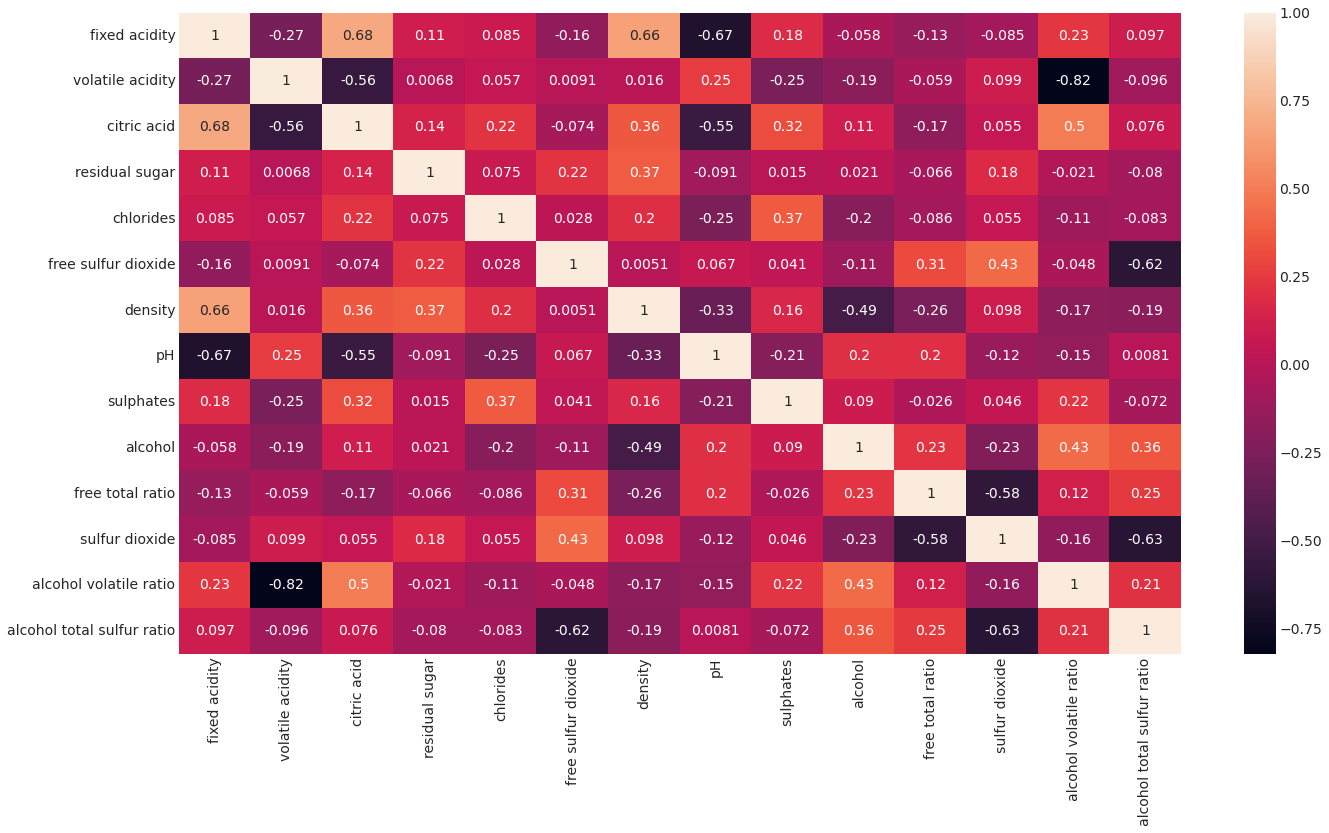

In [52]:
plt.rcParams['figure.figsize'] = (20, 11)
sns.heatmap(train_df.corr(), annot = True)

In [53]:
kBest = SelectKBest(f_regression, k = 'all').fit(train_df, y)
kScore = pd.Series(
    kBest.scores_,
    index = kBest.feature_names_in_
).sort_values(ascending = False)
kScore

alcohol                       325.918093
alcohol volatile ratio        303.924538
volatile acidity              244.188622
sulphates                      77.779030
citric acid                    74.801347
sulfur dioxide                 49.334003
alcohol total sulfur ratio     40.069381
density                        34.045205
free total ratio               33.724366
fixed acidity                  22.058108
chlorides                      18.443174
free sulfur dioxide             8.049586
pH                              6.241382
residual sugar                  0.180382
dtype: float64

We'll delete **residual sugar** for it only has 0.18 score, and delete **pH** for it being second lowest and also has high VIF value.

In [54]:
train_df.drop(['pH', 'residual sugar'], axis = 1, inplace = True)
test_df.drop(['pH', 'residual sugar'], axis = 1, inplace = True)

In [55]:
vif = pd.DataFrame()
vif['features'] = train_df.columns
vif['VIF'] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
vif

,features,VIF
0,fixed acidity,53.565615
1,volatile acidity,37.363009
2,citric acid,9.509361
3,chlorides,6.018175
4,free sulfur dioxide,14.398267
5,density,240.322653
6,sulphates,20.021077
7,alcohol,158.293393
8,free total ratio,31.114582
9,sulfur dioxide,9.659079


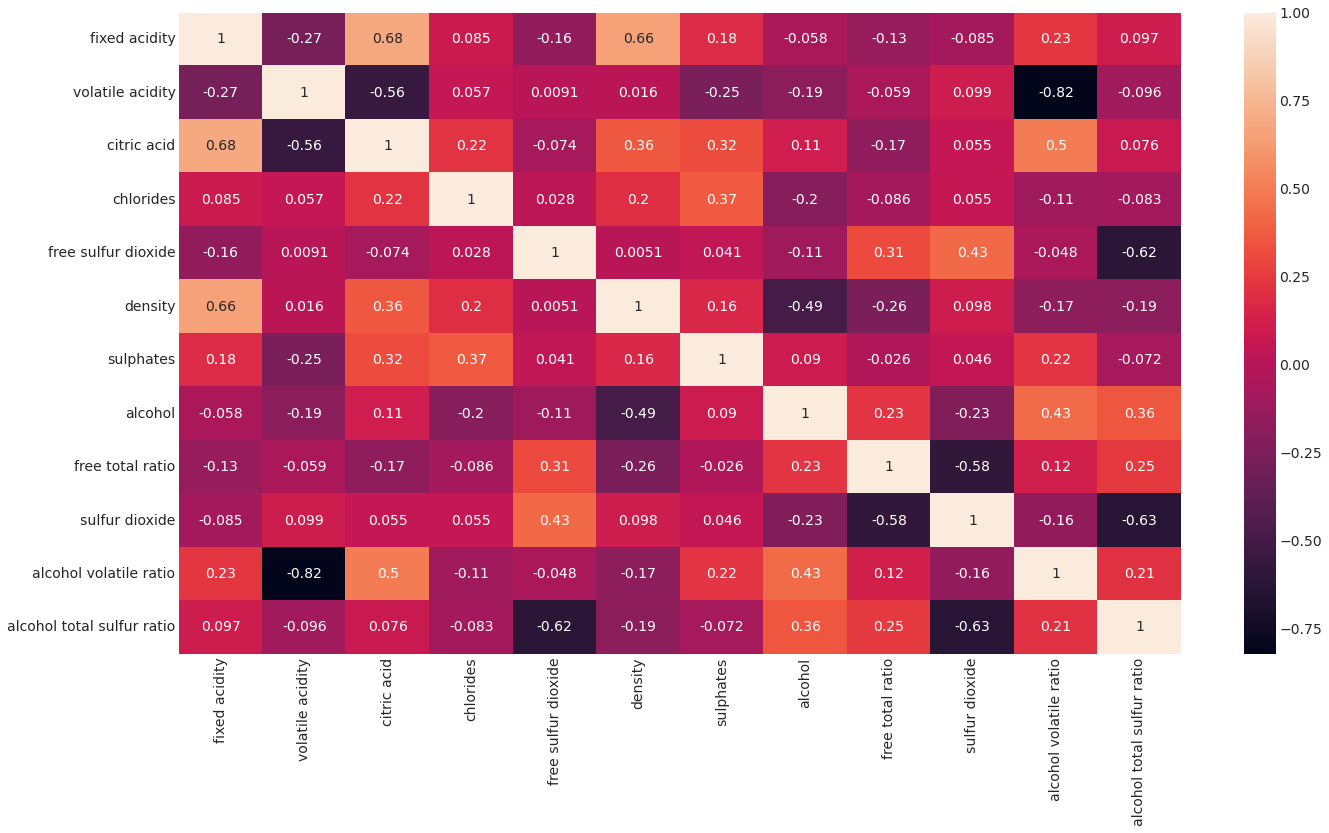

In [56]:
plt.rcParams['figure.figsize'] = (20, 11)
sns.heatmap(train_df.corr(), annot = True)

In [57]:
kBest = SelectKBest(f_regression, k = 'all').fit(train_df, y)
kScore = pd.Series(
    kBest.scores_,
    index = kBest.feature_names_in_
).sort_values(ascending = False)
kScore

alcohol                       325.918093
alcohol volatile ratio        303.924538
volatile acidity              244.188622
sulphates                      77.779030
citric acid                    74.801347
sulfur dioxide                 49.334003
alcohol total sulfur ratio     40.069381
density                        34.045205
free total ratio               33.724366
fixed acidity                  22.058108
chlorides                      18.443174
free sulfur dioxide             8.049586
dtype: float64

Great, we have the features we want. We still can do other feature engineering by using clustering (KMeans) or Linear Discriminant Analysis. But first thing first, I want to see the data by using projection.

## TSNE Analysis (See further through data)

In [58]:
tsne = make_pipeline(
    StandardScaler(),
    TSNE(n_components = 2, random_state = 0, init = 'pca')
)
tsne_df = pd.DataFrame(
    tsne.fit_transform(train_df),
    columns = ['F1', 'F2']
)
tsne_df

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


,F1,F2
0,-31.996651,3.494525
1,-0.736896,10.080837
2,-26.354092,-20.452175
3,-23.048334,-26.811810
4,-15.309153,39.144962
...,...,...
1194,-21.389633,3.318974
1195,-17.308599,-20.240906
1196,-24.564049,24.571524
1197,37.364422,23.284721


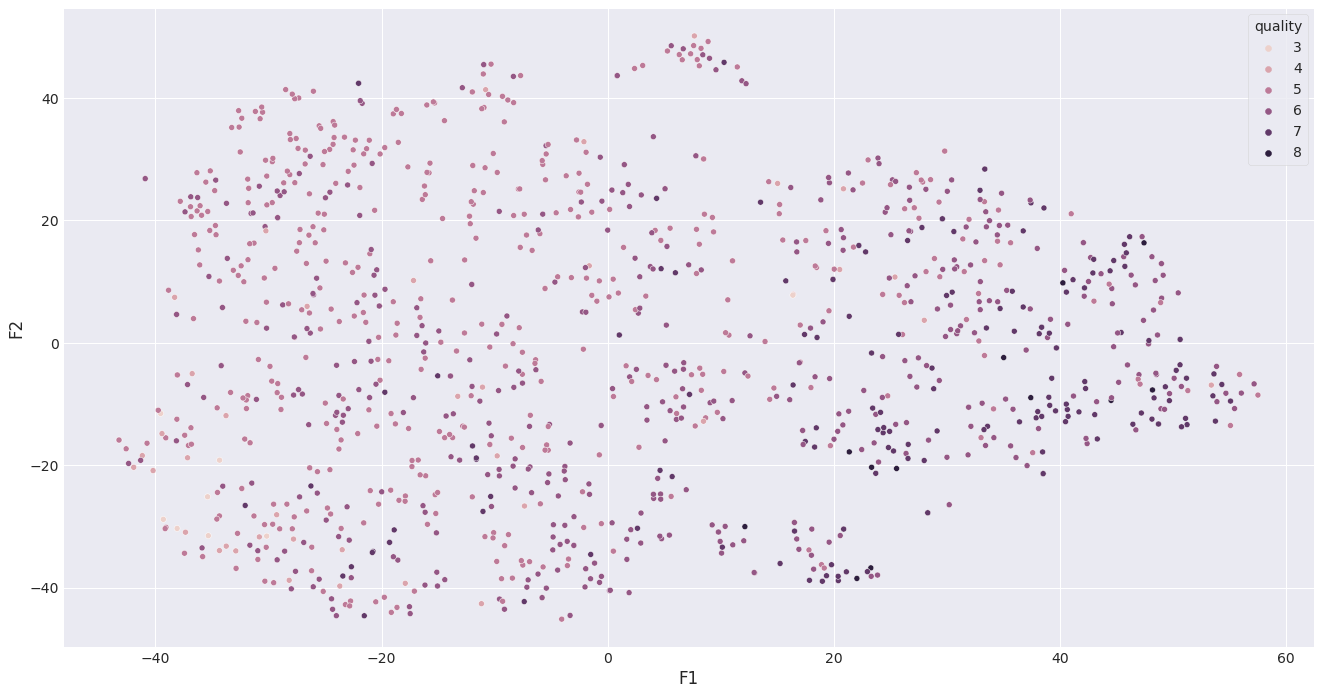

In [59]:
_ = sns.scatterplot(data = tsne_df, x = 'F1', y = 'F2', hue = y)

In [60]:
tsne_df.corrwith(y)

F1    0.488941
F2   -0.146979
dtype: float64

## UMAP Analysis

In [61]:
umap = UMAP(random_state = 0, n_components = 2)
umap_df = pd.DataFrame(
    umap.fit_transform(train_df),
    columns = ['F1', 'F2']
)
umap_df

,F1,F2
0,2.659258,2.980552
1,3.341573,2.285596
2,10.495504,8.399904
3,8.824568,5.772134
4,-1.272223,1.591195
...,...,...
1194,6.105790,6.053151
1195,6.984624,2.719561
1196,-1.038847,2.024194
1197,4.549802,3.618207


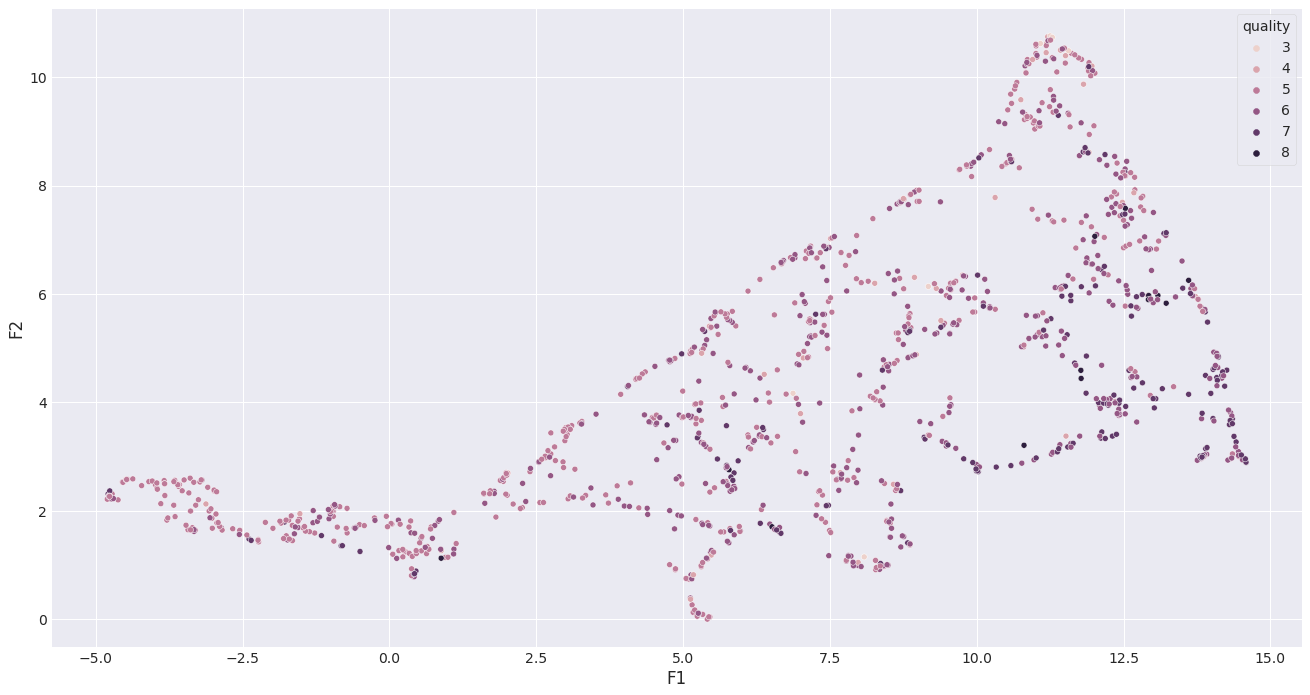

In [62]:
sns.scatterplot(data = umap_df, x = 'F1', y = 'F2', hue = y)

In [63]:
umap_df.corrwith(y)

F1    0.284566
F2   -0.068383
dtype: float64

## K-Means Cluster

We'll see if we can cluster the data as well so we can get additional information using K-Means. <br>
We'll use elbow method to find which one is the best number of cluster.

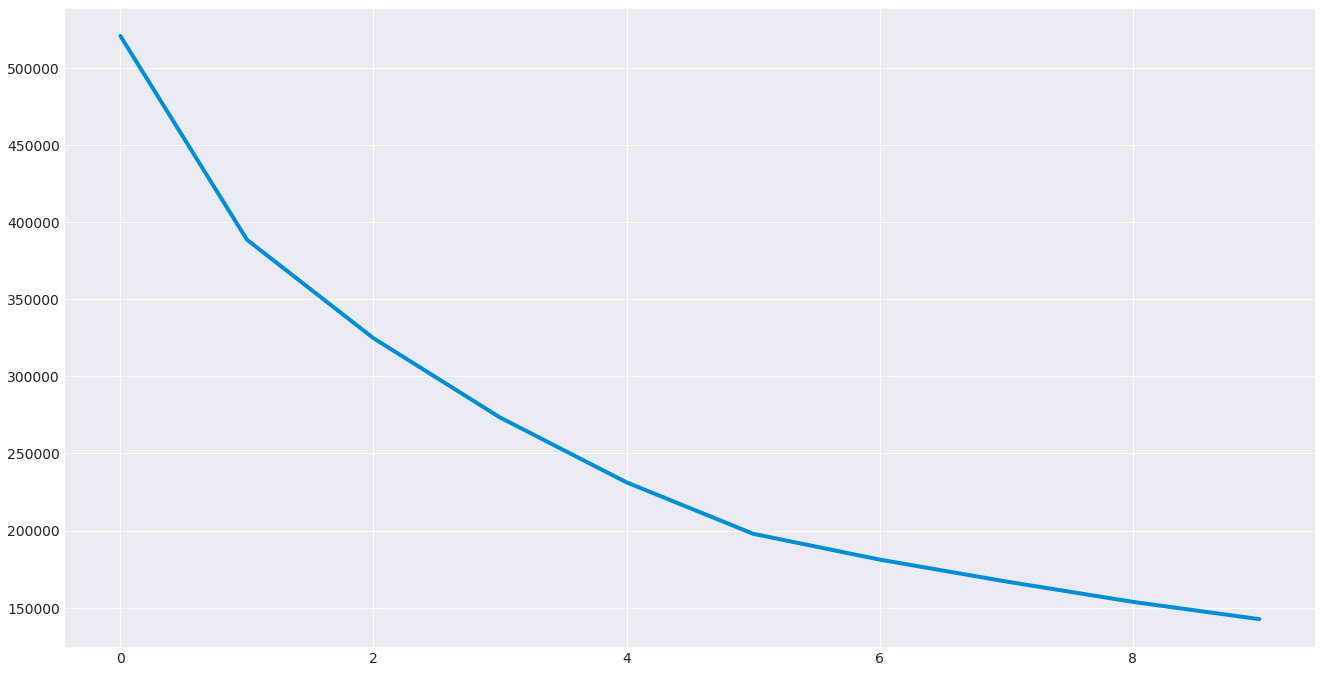

In [64]:
wcss = [] 
for i in range(2, 12) :
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(train_df)
    wcss.append(kmeans.inertia_)
sns.lineplot(data = wcss)

Using the elbow method, we see that there is a reduced amount of variance in 5, so let's use that.

In [65]:
n_clusters = 5

In [66]:
kmeans = KMeans(n_clusters = n_clusters, random_state = 0).fit(train_df)

In [67]:
cluster = pd.Series(kmeans.predict(train_df))
cluster

0       0
1       0
2       4
3       4
4       3
       ..
1194    4
1195    0
1196    3
1197    0
1198    2
Length: 1199, dtype: int32

In [68]:
pd.get_dummies(cluster).corrwith(y)

0   -0.052809
1    0.386764
2   -0.150286
3   -0.120323
4   -0.086070
dtype: float64

We don't see the K-Means clustering to be any helpful, so we won't take the cluster feature into estimator.

## Linear Discriminant Analysis
Linear Discriminant Analysis is a method of grouping independent variables to a group of target variable and then regenerate a number that's really helpful to separate the target variable.

In [69]:
lda = make_pipeline(
    StandardScaler(),
    LinearDiscriminantAnalysis(n_components = 2)
)

LDA is actually only good when it comes to classification problem. But we can actually classify this case as a classification problem.

In [70]:
xtrain, xval, ytrain, yval = train_test_split(train_df, y, random_state = 0)

In [71]:
lda.fit(xtrain, ytrain)
xtrain_lda = lda.transform(xtrain)
xval_lda = lda.transform(xval)

In [72]:
xtrain_lda = pd.DataFrame(
    xtrain_lda,
    columns = [f'LD{i}' for i in range(xtrain_lda.shape[1])]
)
xval_lda = pd.DataFrame(
    xval_lda,
    columns = [f'LD{i}' for i in range(xval_lda.shape[1])]
)

In [73]:
xtrain_lda.corrwith(ytrain)

LD0    0.033238
LD1    0.049578
dtype: float64

Well, it turns out LDA is not really good at making a useful feature too...

I guess let's just go to the Modelling part.

# Modelling & Evaluation
The model or algorithm that we'll use here is Decision Tree based algorithm cause this is what we're planning at the beginning. Also, I don't remove the outlier because we are using this algorithm, so thing should be fine. <br> <br>
Last time, we have experiment with 6 baselines, the winners are Extra Trees Regressor, Random Forest Regressor, and Extra Tree Regressor. These three algorithm will be used again.

In [74]:
total_scores = pd.DataFrame(
    index = ['ETSR', 'RFR', 'ETR'],
    columns = ['meanCorr_val', 'stdCorr_val', 'CorrTest']
)
display(total_scores)

,meanCorr_val,stdCorr_val,CorrTest
ETSR,NaN,NaN,NaN
RFR,NaN,NaN,NaN
ETR,NaN,NaN,NaN


## Data Splitting
Now, we'll be using K-Fold Cross Validation for the validation cause data splitting with train test split doesn't really guarantee certainty.

In [75]:
kf = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)

In [76]:
def corrcoef(ytrue, ypred) :
    return np.corrcoef(ytrue, ypred)[0, 1]

correlation_metric = make_scorer(corrcoef, greater_is_better = True)
correlation_metric

make_scorer(corrcoef)

## Extra Trees Regression

In [77]:
etsr_best_params = {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 3000} # Best Params Found

In [78]:
scores = []
for i, (t, v) in enumerate(kf.split(train_df, y)) :
    xtrain = train_df.iloc[t, :]
    xval = train_df.iloc[v, :]
    ytrain = y.iloc[t]
    yval = y.iloc[v]
    etsr = ExtraTreesRegressor(
        random_state = 0,
        n_jobs = -1,
        **etsr_best_params
    )
    etsr.fit(xtrain, ytrain)
    yhat = etsr.predict(xval)
    score = np.corrcoef(yval, yhat)[1, 0]
    scores.append(score)
    print(f'FOLD {i} : {score}')
print('')
print(np.mean(scores), np.std(scores))

FOLD 0 : 0.7008493160771163
FOLD 1 : 0.6695415260810026
FOLD 2 : 0.6958738652472856
FOLD 3 : 0.7507040017166503
FOLD 4 : 0.7206425811404409

0.7075222580524991 0.027053853974805413


In [79]:
print('Extra Trees Regressor Cross-Validation Evaluation')
print(f'Mean Correlation : {np.mean(scores)}')
print(f'Standard Deviation : {np.std(scores)}')

Extra Trees Regressor Cross-Validation Evaluation
Mean Correlation : 0.7075222580524991
Standard Deviation : 0.027053853974805413


In [80]:
total_scores.loc['ETSR', ['meanCorr_val', 'stdCorr_val']] = [np.mean(scores), np.std(scores)]
total_scores

,meanCorr_val,stdCorr_val,CorrTest
ETSR,0.707522,0.027054,NaN
RFR,NaN,NaN,NaN
ETR,NaN,NaN,NaN


## Random Forest Regression

In [81]:
rfr_best_params = {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 5000}

In [82]:
scores = []
for i, (t, v) in enumerate(kf.split(train_df, y)) :
    xtrain = train_df.iloc[t, :]
    xval = train_df.iloc[v, :]
    ytrain = y.iloc[t]
    yval = y.iloc[v]
    rfr = RandomForestRegressor(
        random_state = 0,
        n_jobs = -1,
        **rfr_best_params
    )
    rfr.fit(xtrain, ytrain)
    yhat = rfr.predict(xval)
    score = np.corrcoef(yval, yhat)[1, 0]
    scores.append(score)
    print(f'FOLD {i} : {score}')
print('')
print(np.mean(scores), np.std(scores))

FOLD 0 : 0.7020477497670684
FOLD 1 : 0.6668158625058179
FOLD 2 : 0.6763362879556278
FOLD 3 : 0.7353297490849483
FOLD 4 : 0.7172500310051318

0.6995559360637189 0.025338193717177875


In [83]:
print('Random Forest Regressor Cross-Validation Evaluation')
print(f'Mean Correlation : {np.mean(scores)}')
print(f'Standard Deviation : {np.std(scores)}')

Random Forest Regressor Cross-Validation Evaluation
Mean Correlation : 0.6995559360637189
Standard Deviation : 0.025338193717177875


In [84]:
total_scores.loc['RFR', ['meanCorr_val', 'stdCorr_val']] = [np.mean(scores), np.std(scores)]
total_scores

,meanCorr_val,stdCorr_val,CorrTest
ETSR,0.707522,0.027054,NaN
RFR,0.699556,0.025338,NaN
ETR,NaN,NaN,NaN


## Extra Tree Regression

In [85]:
etr_best_params = {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}

In [86]:
scores = []
for i, (t, v) in enumerate(kf.split(train_df, y)) :
    xtrain = train_df.iloc[t, :]
    xval = train_df.iloc[v, :]
    ytrain = y.iloc[t]
    yval = y.iloc[v]
    etr = ExtraTreeRegressor(
        random_state = 0,
        **etr_best_params
    )
    etr.fit(xtrain, ytrain)
    yhat = etr.predict(xval)
    score = np.corrcoef(yval, yhat)[1, 0]
    scores.append(score)
    print(f'FOLD {i} : {score}')
print('')
print(np.mean(scores), np.std(scores))

FOLD 0 : 0.4715525721838716
FOLD 1 : 0.4290295770270871
FOLD 2 : 0.4924127420838923
FOLD 3 : 0.5980702264153757
FOLD 4 : 0.6221650922947319

0.5226460420009917 0.0746746095563727


In [87]:
print('Extra Tree Regressor Cross-Validation Evaluation')
print(f'Mean Correlation : {np.mean(scores)}')
print(f'Standard Deviation : {np.std(scores)}')

Extra Tree Regressor Cross-Validation Evaluation
Mean Correlation : 0.5226460420009917
Standard Deviation : 0.0746746095563727


In [88]:
total_scores.loc['ETR', ['meanCorr_val', 'stdCorr_val']] = [np.mean(scores), np.std(scores)]
total_scores

,meanCorr_val,stdCorr_val,CorrTest
ETSR,0.707522,0.027054,NaN
RFR,0.699556,0.025338,NaN
ETR,0.522646,0.074675,NaN


# Test Set Prediction
After we're done with every inspection, we'll try predicting the test set.

## Extra Trees Regressor Prediction

In [89]:
model_etsr = []
scores = []
test_preds = []
for i, (t, v) in enumerate(kf.split(train_df, y)) :
    xtrain = train_df.iloc[t, :]
    xval = train_df.iloc[v, :]
    ytrain = y.iloc[t]
    yval = y.iloc[v]
    etsr = ExtraTreesRegressor(
        random_state = 0,
        n_jobs = -1,
        **etsr_best_params
    )
    etsr.fit(xtrain, ytrain)
    model_etsr.append(etsr)
    yhat = etsr.predict(xval)
    score = np.corrcoef(yval, yhat)[1, 0]
    scores.append(score)
    ypred = etsr.predict(test_df)
    test_preds.append(ypred)
    print(f'FOLD {i} : {score}')
print('')
print(np.mean(scores), np.std(scores))

FOLD 0 : 0.7008493160771163
FOLD 1 : 0.6695415260810026
FOLD 2 : 0.6958738652472856
FOLD 3 : 0.7507040017166503
FOLD 4 : 0.7206425811404409

0.7075222580524991 0.027053853974805413


In [90]:
prediction = np.mean(test_preds, axis = 0)
correlation = np.corrcoef(ytest, prediction)[0, 1]
print(f'Correlation between predicted and Actual Value : {correlation}')
total_scores.loc['ETSR', 'CorrTest'] = correlation

Correlation between predicted and Actual Value : 0.6737108096928117


## Random Forest Regressor Prediction

In [91]:
model_rfr = []
scores = []
test_preds = []
for i, (t, v) in enumerate(kf.split(train_df, y)) :
    xtrain = train_df.iloc[t, :]
    xval = train_df.iloc[v, :]
    ytrain = y.iloc[t]
    yval = y.iloc[v]
    rfr = RandomForestRegressor(
        random_state = 0,
        n_jobs = -1,
        **rfr_best_params
    )
    rfr.fit(xtrain, ytrain)
    model_rfr.append(rfr)
    yhat = rfr.predict(xval)
    score = np.corrcoef(yval, yhat)[1, 0]
    scores.append(score)
    ypred = rfr.predict(test_df)
    test_preds.append(ypred)
    print(f'FOLD {i} : {score}')
print('')
print(np.mean(scores), np.std(scores))

FOLD 0 : 0.7020477497670684
FOLD 1 : 0.6668158625058179
FOLD 2 : 0.6763362879556278
FOLD 3 : 0.7353297490849483
FOLD 4 : 0.7172500310051318

0.6995559360637189 0.025338193717177875


In [92]:
prediction = np.mean(test_preds, axis = 0)
correlation = np.corrcoef(ytest, prediction)[0, 1]
print(f'Correlation between predicted and Actual Value : {correlation}')
total_scores.loc['RFR', 'CorrTest'] = correlation

Correlation between predicted and Actual Value : 0.6630849358020181


## Extra Tree Regressor

In [93]:
model_etr = []
scores = []
test_preds = []
for i, (t, v) in enumerate(kf.split(train_df, y)) :
    xtrain = train_df.iloc[t, :]
    xval = train_df.iloc[v, :]
    ytrain = y.iloc[t]
    yval = y.iloc[v]
    etr = ExtraTreeRegressor(
        random_state = 0,
        **etr_best_params
    )
    etr.fit(xtrain, ytrain)
    model_etr.append(etr)
    yhat = etr.predict(xval)
    score = np.corrcoef(yval, yhat)[1, 0]
    scores.append(score)
    ypred = etr.predict(test_df)
    test_preds.append(ypred)
    print(f'FOLD {i} : {score}')
print('')
print(np.mean(scores), np.std(scores))

FOLD 0 : 0.4715525721838716
FOLD 1 : 0.4290295770270871
FOLD 2 : 0.4924127420838923
FOLD 3 : 0.5980702264153757
FOLD 4 : 0.6221650922947319

0.5226460420009917 0.0746746095563727


In [94]:
prediction = np.mean(test_preds, axis = 0)
correlation = np.corrcoef(ytest, prediction)[0, 1]
print(f'Correlation between predicted and Actual Value : {correlation}')
total_scores.loc['ETR', 'CorrTest'] = correlation

Correlation between predicted and Actual Value : 0.5735564741992203


In [95]:
total_scores

,meanCorr_val,stdCorr_val,CorrTest
ETSR,0.707522,0.027054,0.673711
RFR,0.699556,0.025338,0.663085
ETR,0.522646,0.074675,0.573556


In [96]:
gc.collect()

46697

## Bonus Part : Ensemble
Just for curiosity, let's find out what happened if we combined trees algorithm!

In [97]:
ensemble_model = model_etsr + model_rfr
ensemble_model = [(f'model-{i}', model) for i, model in enumerate(ensemble_model)]
ensemble_model

[('model-0',
  ExtraTreesRegressor(max_features='sqrt', n_estimators=3000, n_jobs=-1,
                      random_state=0)),
 ('model-1',
  ExtraTreesRegressor(max_features='sqrt', n_estimators=3000, n_jobs=-1,
                      random_state=0)),
 ('model-2',
  ExtraTreesRegressor(max_features='sqrt', n_estimators=3000, n_jobs=-1,
                      random_state=0)),
 ('model-3',
  ExtraTreesRegressor(max_features='sqrt', n_estimators=3000, n_jobs=-1,
                      random_state=0)),
 ('model-4',
  ExtraTreesRegressor(max_features='sqrt', n_estimators=3000, n_jobs=-1,
                      random_state=0)),
 ('model-5',
  RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                        n_estimators=5000, n_jobs=-1, random_state=0)),
 ('model-6',
  RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                        n_estimators=5000, n_jobs=-1, random_state=0)),
 ('model-7',
  RandomForestRegressor(criterion='friedman_m

In [98]:
model_ensemble = VotingRegressor(
    estimators = ensemble_model, verbose = 1
).fit(train_df, y)

[Voting] ................. (1 of 10) Processing model-0, total=   6.2s
[Voting] ................. (2 of 10) Processing model-1, total=   3.6s
[Voting] ................. (3 of 10) Processing model-2, total=   3.6s
[Voting] ................. (4 of 10) Processing model-3, total=   5.2s
[Voting] ................. (5 of 10) Processing model-4, total=   3.6s
[Voting] ................. (6 of 10) Processing model-5, total=  10.3s
[Voting] ................. (7 of 10) Processing model-6, total=   8.7s
[Voting] ................. (8 of 10) Processing model-7, total=  10.2s
[Voting] ................. (9 of 10) Processing model-8, total=  10.3s
[Voting] ................ (10 of 10) Processing model-9, total=   9.7s


In [99]:
ypred_ensemble = model_ensemble.predict(test_df)
ypred_ensemble

array([5.49546667, 4.81336667, 6.9804    , 5.1131    , 5.1189    ,
       5.8669    , 5.27076667, 6.0266    , 4.83816667, 5.3406    ,
       5.32656667, 5.1183    , 5.8555    , 5.26766667, 5.6334    ,
       6.44883333, 6.9571    , 5.4344    , 5.37966667, 5.32296667,
       5.96923333, 5.5042    , 5.9767    , 5.83083333, 5.57546667,
       5.07526667, 5.23863333, 6.6905    , 5.08116667, 6.3325    ,
       5.82506667, 5.81403333, 5.73266667, 5.48633333, 6.77083333,
       6.8853    , 5.2251    , 5.64716667, 6.48686667, 5.88703333,
       5.37186667, 5.88223333, 6.63913333, 6.52193333, 5.92096667,
       5.0737    , 5.2779    , 5.9534    , 5.61826667, 6.10376667,
       5.25843333, 5.38396667, 5.9363    , 6.0341    , 5.77936667,
       5.0889    , 5.04793333, 5.052     , 6.67676667, 5.47773333,
       5.4493    , 5.54213333, 5.78863333, 6.06986667, 5.22023333,
       6.08653333, 5.02906667, 5.0748    , 6.46753333, 6.0099    ,
       5.44923333, 5.58343333, 4.72896667, 5.5035    , 5.78883

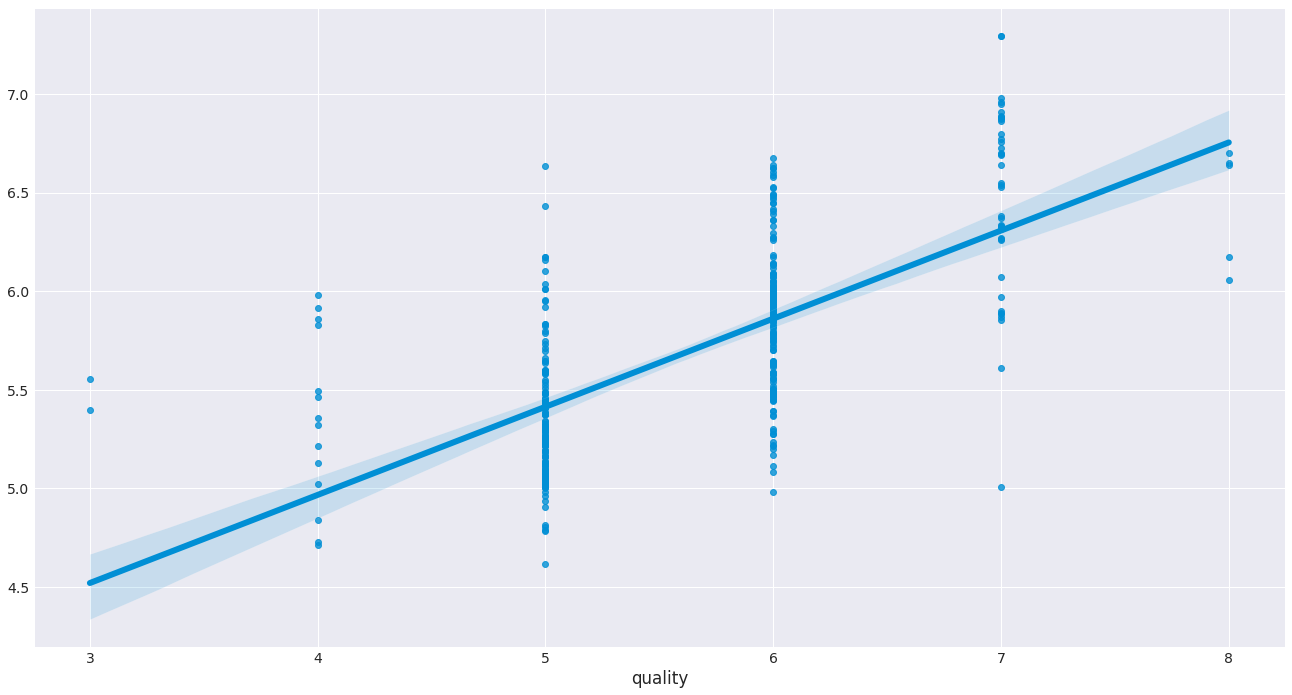

In [100]:
_ = sns.regplot(x = ytest, y = ypred_ensemble)

In [101]:
print(f'Mean Absolute Error : {mean_squared_error(ytest, ypred_ensemble)}')

Mean Absolute Error : 0.33476277571111107


In [102]:
print(f'R2 Score : {r2_score(ytest, ypred_ensemble)}')

R2 Score : 0.45228043364136006


In [103]:
print(f'Correlation : {np.corrcoef(ytest, ypred_ensemble)[0, 1]}')

Correlation : 0.679212501046093


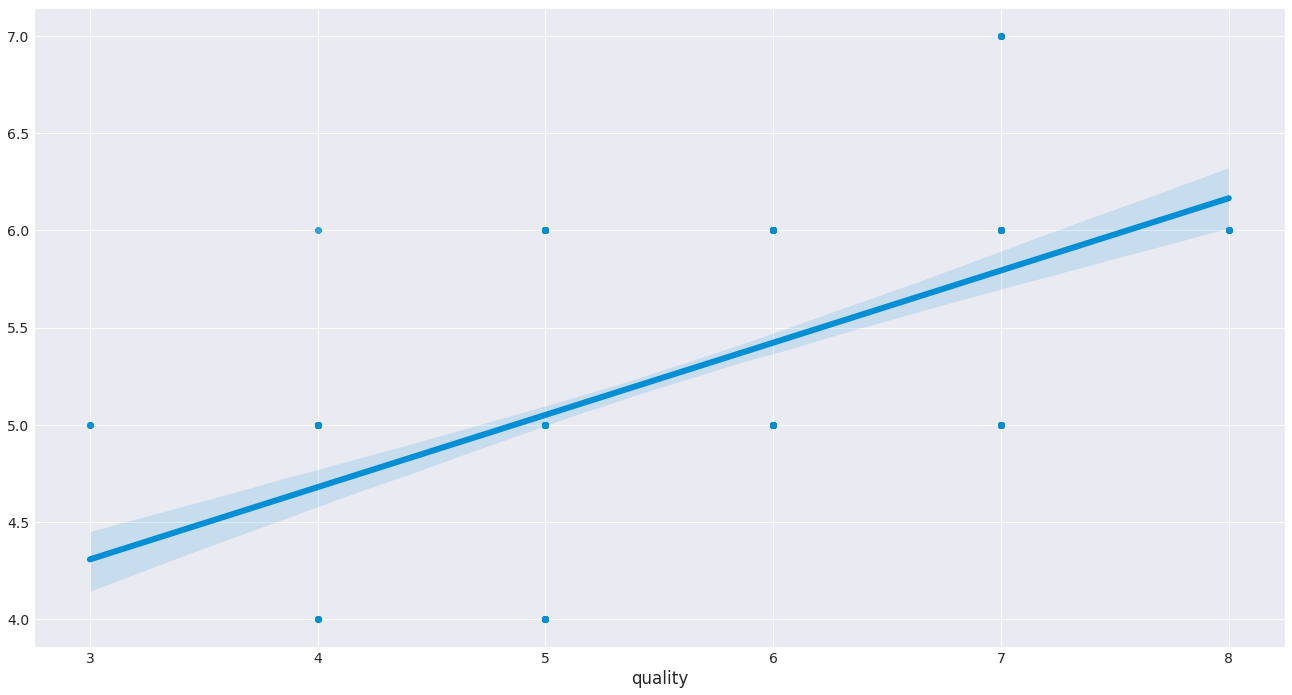

In [104]:
ypred_ensemble = ypred_ensemble.round(1).astype(int)
_ = sns.regplot(x = ytest, y = ypred_ensemble)

In [105]:
print(f'Mean Absolute Error : {mean_squared_error(ytest, ypred_ensemble)}')

Mean Absolute Error : 0.5425


In [106]:
print(f'R2 Score : {r2_score(ytest, ypred_ensemble)}')

R2 Score : 0.1123927559795892


In [107]:
print(f'Correlation : {np.corrcoef(ytest, ypred_ensemble)[0, 1]}')

Correlation : 0.5573946541115897


# The Weight
In this chapter, we'll just see how the model behaves. What's behind the model, how can we derive the rule, etc.

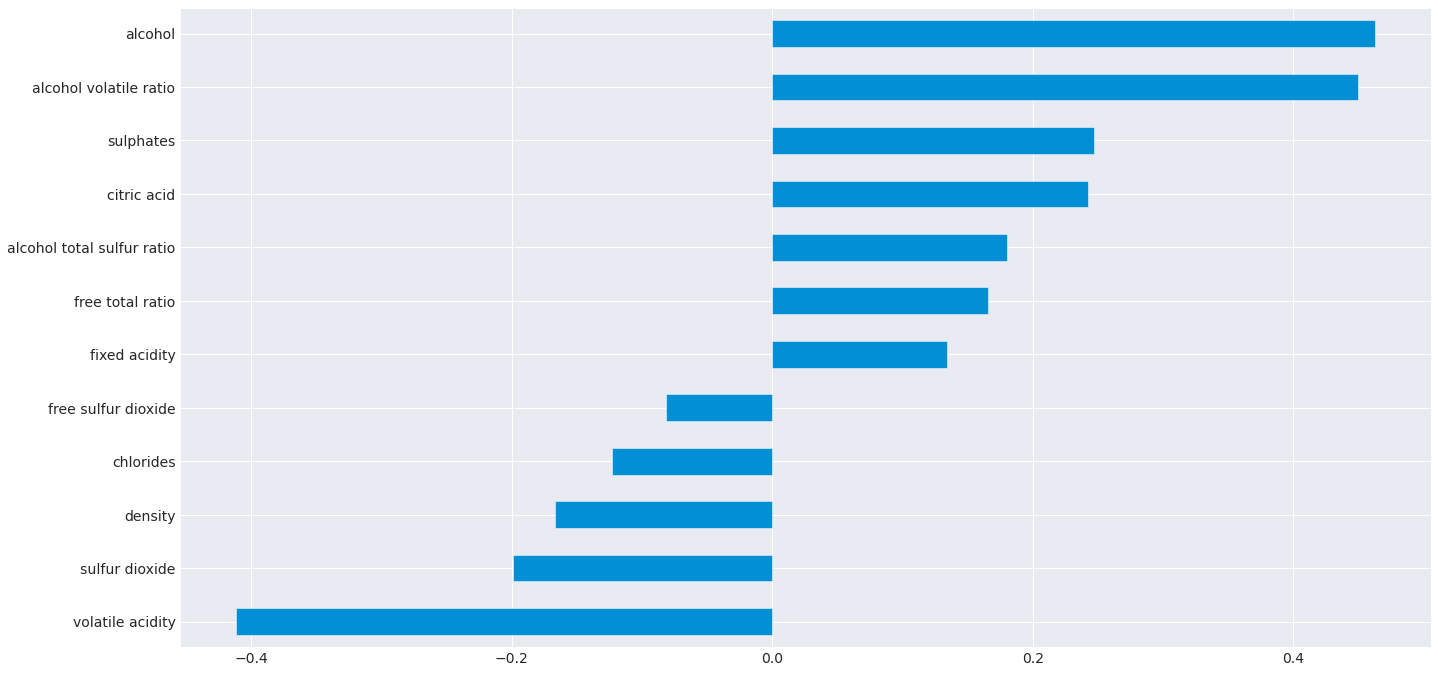

In [108]:
train_df.corrwith(y).sort_values().plot.barh()

## Extra Trees Regressor
We take 5 models from the cross-validation. So in total there are 5x3000 = 15000 trees that are impossible to look at them one by one. So, let's just take some trees as representation among their tree-friends.

But first thing first, let's look for the weight that the decision tree has made.

### Feature Importances

In [109]:
etsr_weights = ''
for i, model in enumerate(model_etsr) :
    weights = pd.Series(
        model.feature_importances_,
        index = model.feature_names_in_,
        name = f'Extra Trees {i}'
    )
    if i == 0 : etsr_weights = weights; continue
    etsr_weights = pd.concat([
        etsr_weights, weights
    ], axis = 1)

In [110]:
etsr_weights

,Extra Trees 0,Extra Trees 1,Extra Trees 2,Extra Trees 3,Extra Trees 4
fixed acidity,0.062101,0.058899,0.060004,0.061587,0.064385
volatile acidity,0.104541,0.099364,0.112255,0.109278,0.103664
citric acid,0.071884,0.073268,0.073856,0.075749,0.073869
chlorides,0.063303,0.060292,0.057459,0.060027,0.061218
free sulfur dioxide,0.053202,0.052486,0.053356,0.054388,0.055148
density,0.069193,0.068153,0.070340,0.068867,0.067845
sulphates,0.094759,0.097416,0.100337,0.097209,0.092919
alcohol,0.152025,0.170088,0.145130,0.146214,0.157154
free total ratio,0.063849,0.060630,0.061644,0.063402,0.060041
sulfur dioxide,0.068264,0.062150,0.066948,0.065414,0.068296


In [111]:
etsr_weights = etsr_weights.mean(axis = 1).sort_values(ascending = False)
etsr_weights

alcohol                       0.154122
alcohol volatile ratio        0.127498
volatile acidity              0.105820
sulphates                     0.096528
citric acid                   0.073725
alcohol total sulfur ratio    0.069728
density                       0.068879
sulfur dioxide                0.066215
free total ratio              0.061913
fixed acidity                 0.061395
chlorides                     0.060460
free sulfur dioxide           0.053716
dtype: float64

According Extra Trees Regression, we have the order of importace of the features here, starting from alcohol, alcohol volatile ratio, and so on. This is what this model (highest scoring model) thinks.

### Rules

For the rules of this Extra Trees itself, because it has 5 models and each model has 3000 trees (totalling 15000 trees). We'll just see the model with the highest CV score and see 5 to 10 trees in it.

In [112]:
# In Extra Trees Regressor, highest CV score is FOLD 3 (4th fold), so let's just take that 4th fold's model.
etsr_best = model_etsr[3]
etsr_best

ExtraTreesRegressor(max_features='sqrt', n_estimators=3000, n_jobs=-1,
                    random_state=0)

In [113]:
# Taking 10 first trees in the estimator
for i in range(10) :
    path = f'/content/drive/MyDrive/ML Project /Red Wine Quality/Decision Function Feat/Extra Trees - {i}.txt'
    text = tree.export_text(etsr_best[i], feature_names = train_df.columns.tolist(), max_depth = 30)
    with open(path, 'w') as f :
        f.write(text)
    print(f'Trees {i} Done')

Trees 0 Done
Trees 1 Done
Trees 2 Done
Trees 3 Done
Trees 4 Done
Trees 5 Done
Trees 6 Done
Trees 7 Done
Trees 8 Done
Trees 9 Done


In [114]:
for i in range(10) :
    path = f'/content/drive/MyDrive/ML Project /Red Wine Quality/Decision Function Feat/Extra Trees - {i}'
    tree.export_graphviz(etsr_best[i], out_file = path + '.dot', feature_names = train_df.columns)
    (graph, ) = pydot.graph_from_dot_file(path + '.dot')
    graph.write_png(path + '.png')
    os.remove(path + '.dot')
    print(f'Extra Trees - {i} Done')

Extra Trees - 0 Done
Extra Trees - 1 Done
Extra Trees - 2 Done
Extra Trees - 3 Done
Extra Trees - 4 Done
Extra Trees - 5 Done
Extra Trees - 6 Done
Extra Trees - 7 Done
Extra Trees - 8 Done
Extra Trees - 9 Done


In [115]:
print(tree.export_text(etsr_best[0], feature_names = train_df.columns.tolist(), max_depth = 30))

|--- free total ratio <= 0.31
|   |--- volatile acidity <= 0.46
|   |   |--- alcohol total sulfur ratio <= 0.31
|   |   |   |--- density <= 1.00
|   |   |   |   |--- sulfur dioxide <= 150.63
|   |   |   |   |   |--- fixed acidity <= 5.26
|   |   |   |   |   |   |--- value: [7.00]
|   |   |   |   |   |--- fixed acidity >  5.26
|   |   |   |   |   |   |--- volatile acidity <= 0.30
|   |   |   |   |   |   |   |--- value: [6.00]
|   |   |   |   |   |   |--- volatile acidity >  0.30
|   |   |   |   |   |   |   |--- alcohol <= 10.55
|   |   |   |   |   |   |   |   |--- alcohol <= 9.81
|   |   |   |   |   |   |   |   |   |--- free sulfur dioxide <= 7.36
|   |   |   |   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |   |   |   |--- free sulfur dioxide >  7.36
|   |   |   |   |   |   |   |   |   |   |--- sulphates <= 0.55
|   |   |   |   |   |   |   |   |   |   |   |--- value: [6.00]
|   |   |   |   |   |   |   |   |   |   |--- sulphates >  0.55
|   |   |   |   |   |   |   

## Random Forest Regressor
We'll apply the same as Extra Trees Regressor for Random Forest Regressor

### Feature Importances

In [116]:
rfr_weights = ''
for i, model in enumerate(model_rfr) :
    weights = pd.Series(
        model.feature_importances_,
        index = model.feature_names_in_,
        name = f'Extra Trees {i}'
    )
    if i == 0 : rfr_weights = weights; continue
    rfr_weights = pd.concat([
        rfr_weights, weights
    ], axis = 1)

In [117]:
rfr_weights

,Extra Trees 0,Extra Trees 1,Extra Trees 2,Extra Trees 3,Extra Trees 4
fixed acidity,0.056675,0.054324,0.053832,0.053519,0.060265
volatile acidity,0.099549,0.093908,0.102057,0.100974,0.095673
citric acid,0.058715,0.059584,0.058647,0.060400,0.060006
chlorides,0.062434,0.058880,0.057912,0.061749,0.061173
free sulfur dioxide,0.042735,0.041554,0.041653,0.043445,0.044461
density,0.067993,0.068159,0.071181,0.067360,0.066049
sulphates,0.110980,0.118968,0.124950,0.115546,0.109899
alcohol,0.152810,0.169252,0.138277,0.148257,0.154523
free total ratio,0.056451,0.055368,0.054841,0.057919,0.053998
sulfur dioxide,0.057763,0.051906,0.057670,0.055575,0.056758


In [118]:
rfr_weights = rfr_weights.mean(axis = 1).sort_values(ascending = False)
rfr_weights

alcohol volatile ratio        0.157867
alcohol                       0.152624
sulphates                     0.116069
volatile acidity              0.098432
alcohol total sulfur ratio    0.076817
density                       0.068148
chlorides                     0.060429
citric acid                   0.059471
sulfur dioxide                0.055934
fixed acidity                 0.055723
free total ratio              0.055715
free sulfur dioxide           0.042770
dtype: float64

Random Forest thinks quite differently than Extra Trees. Extra Trees thinks that alcohol is the best feature / predictor that they can use the quality of the wine. But Random Forest thinks that alcohol-volatile ratio is more important than alcohol. But we see that Random Forest's overall score is less than Extra Trees, so let's suppose Extra Trees is the best algorithm until now.

### Rules

In [119]:
# Best fold is FOLD 3 (4th fold)
rfr_best = model_rfr[3]
rfr_best

RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                      n_estimators=5000, n_jobs=-1, random_state=0)

In [120]:
# Taking 10 first trees in the estimator
for i in range(10) :
    path = f'/content/drive/MyDrive/ML Project /Red Wine Quality/Decision Function Feat/Random Forest - {i}.txt'
    text = tree.export_text(rfr_best[i], feature_names = train_df.columns.tolist(), max_depth = 30)
    with open(path, 'w') as f :
        f.write(text)
    print(f'Trees {i} Done')

Trees 0 Done
Trees 1 Done
Trees 2 Done
Trees 3 Done
Trees 4 Done
Trees 5 Done
Trees 6 Done
Trees 7 Done
Trees 8 Done
Trees 9 Done


In [121]:
for i in range(10) :
    path = f'/content/drive/MyDrive/ML Project /Red Wine Quality/Decision Function Feat/Random Forest - {i}'
    tree.export_graphviz(rfr_best[i], out_file = path + '.dot', feature_names = train_df.columns)
    (graph, ) = pydot.graph_from_dot_file(path + '.dot')
    graph.write_png(path + '.png')
    os.remove(path + '.dot')
    print(f'Random Forest - {i} Done')

Random Forest - 0 Done
Random Forest - 1 Done
Random Forest - 2 Done
Random Forest - 3 Done
Random Forest - 4 Done
Random Forest - 5 Done
Random Forest - 6 Done
Random Forest - 7 Done
Random Forest - 8 Done
Random Forest - 9 Done


In [122]:
print(tree.export_text(rfr_best[10], feature_names = train_df.columns.tolist(), max_depth = 30))

|--- alcohol <= 10.53
|   |--- sulfur dioxide <= 6.50
|   |   |--- free total ratio <= 0.59
|   |   |   |--- density <= 1.00
|   |   |   |   |--- sulfur dioxide <= 5.50
|   |   |   |   |   |--- value: [5.00]
|   |   |   |   |--- sulfur dioxide >  5.50
|   |   |   |   |   |--- value: [6.00]
|   |   |   |--- density >  1.00
|   |   |   |   |--- volatile acidity <= 0.25
|   |   |   |   |   |--- value: [6.00]
|   |   |   |   |--- volatile acidity >  0.25
|   |   |   |   |   |--- value: [7.00]
|   |   |--- free total ratio >  0.59
|   |   |   |--- chlorides <= 0.06
|   |   |   |   |--- value: [6.00]
|   |   |   |--- chlorides >  0.06
|   |   |   |   |--- value: [7.00]
|   |--- sulfur dioxide >  6.50
|   |   |--- chlorides <= 0.10
|   |   |   |--- fixed acidity <= 10.05
|   |   |   |   |--- alcohol volatile ratio <= 30.15
|   |   |   |   |   |--- sulfur dioxide <= 40.50
|   |   |   |   |   |   |--- chlorides <= 0.06
|   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |--- 

## Extra Tree Regressor
This will be the same as two above.

### Feature Importances

In [123]:
etr_weights = ''
for i, model in enumerate(model_etr) :
    weights = pd.Series(
        model.feature_importances_,
        index = train_df.columns.tolist(),
        name = f'Extra Tree {i}'
    )
    if i == 0 : etr_weights = weights; continue
    etr_weights = pd.concat([
        etr_weights, weights
    ], axis = 1)
etr_weights

,Extra Tree 0,Extra Tree 1,Extra Tree 2,Extra Tree 3,Extra Tree 4
fixed acidity,0.035441,0.006769,0.005856,0.022191,0.025999
volatile acidity,0.032912,0.020393,0.057890,0.062900,0.053079
citric acid,0.000000,0.000000,0.000000,0.000000,0.031412
chlorides,0.046198,0.040608,0.025244,0.015901,0.006476
free sulfur dioxide,0.007794,0.016282,0.021448,0.000000,0.017030
density,0.035975,0.034721,0.011680,0.000000,0.010779
sulphates,0.099652,0.156353,0.119728,0.150179,0.102741
alcohol,0.203196,0.226715,0.152124,0.198076,0.216531
free total ratio,0.009186,0.013685,0.023517,0.026275,0.004599
sulfur dioxide,0.040417,0.000000,0.004253,0.036479,0.020674


In [124]:
etr_weights = etr_weights.mean(axis = 1).sort_values(ascending = False)
etr_weights

alcohol volatile ratio        0.457147
alcohol                       0.199329
sulphates                     0.125730
alcohol total sulfur ratio    0.052982
volatile acidity              0.045435
chlorides                     0.026885
sulfur dioxide                0.020365
fixed acidity                 0.019251
density                       0.018631
free total ratio              0.015452
free sulfur dioxide           0.012511
citric acid                   0.006282
dtype: float64

We see that Extra Tree has different behaviour than two models above. Extra Trees Regressor considers **alcohol** the most important, Random Forest Regressor considers **alcohol volatile ratio** the most important, but these two models have only little difference between importance of **alcohol** and **alcohol volatile ratio**. <br>
While Extra Tree considers **alcohol volatile ratio** is the most important variable and the importance different between **alcohol volatile ratio** and **alcohol** is big enough. Maybe this is why it doesn't really score good.

### Rules

In [125]:
etr_best = model_etr[4]
etr_best

ExtraTreeRegressor(max_depth=5, random_state=0, splitter='best')

In [126]:
path = f'/content/drive/MyDrive/ML Project /Red Wine Quality/Decision Function Feat/Extra Tree'
tree.export_graphviz(etr_best, out_file = path + '.dot', feature_names = train_df.columns.tolist())
(graph, ) = pydot.graph_from_dot_file(path + '.dot')
graph.write_png(path + '.png')
os.remove(path + '.dot')

In [127]:
text = tree.export_text(etr_best, feature_names = train_df.columns.tolist(), max_depth = 30)
with open(path + '.txt', 'w') as f :
    f.write(text)
print(text)

|--- alcohol volatile ratio <= 27.66
|   |--- alcohol <= 11.45
|   |   |--- alcohol volatile ratio <= 16.37
|   |   |   |--- volatile acidity <= 0.87
|   |   |   |   |--- fixed acidity <= 10.65
|   |   |   |   |   |--- value: [5.20]
|   |   |   |   |--- fixed acidity >  10.65
|   |   |   |   |   |--- value: [6.20]
|   |   |   |--- volatile acidity >  0.87
|   |   |   |   |--- free sulfur dioxide <= 6.50
|   |   |   |   |   |--- value: [4.00]
|   |   |   |   |--- free sulfur dioxide >  6.50
|   |   |   |   |   |--- value: [4.92]
|   |   |--- alcohol volatile ratio >  16.37
|   |   |   |--- alcohol total sulfur ratio <= 0.16
|   |   |   |   |--- citric acid <= 0.45
|   |   |   |   |   |--- value: [5.26]
|   |   |   |   |--- citric acid >  0.45
|   |   |   |   |   |--- value: [4.89]
|   |   |   |--- alcohol total sulfur ratio >  0.16
|   |   |   |   |--- sulphates <= 0.64
|   |   |   |   |   |--- value: [5.49]
|   |   |   |   |--- sulphates >  0.64
|   |   |   |   |   |--- value: [5.83]
|